#import libraries

In [ ]:
# Amir Mohammad Mahfoozi 401106469
# Radin Cheraghi 401105815
# Sepehr zolfaghari 401105923

In [ ]:
!pip install -q transformers[torch]
!pip install -q python-bidi
!pip install -q hazm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 892.6/892.6 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 21.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 30.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-stubs 2.0.3.230814 requires numpy>=1.25.0; python_version >= "3.9", but you have numpy 1.24.3 which is incompatible.


In [ ]:
%load_ext cudf.pandas
import pandas as pd
import numpy as np
import string
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
import re
from hazm import Normalizer, word_tokenize, stopwords_list
import os
from wordcloud import WordCloud, STOPWORDS
from bidi import algorithm as bidi
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import string
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import torch
from tqdm import tqdm
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True


# Exploratory Data Analysis (EDA) on Movie Dataset

The Exploratory Data Analysis (EDA) process is a crucial step to understand the characteristics and patterns present in a dataset. In this notebook, we'll perform EDA on a movie dataset to gain insights into various aspects such as genre distribution, release years, runtime, and ratings for both Persian and English language movies.

During the EDA process, we'll explore the dataset by:

1. Analyzing the genre distribution for Persian and English movies to identify popular genres.
2. Examining the release year trends for Persian and English movies to understand the distribution over time.
3. Investigating the runtime statistics for Persian and English movies to study the typical movie lengths.
4. Evaluating the rating distributions for Persian and English movies to gauge audience preferences.
...

The EDA process is iterative, and additional analyses may be required based on the insights gained from the initial exploration. The goal is to develop a comprehensive understanding of the dataset for both Persian and English language movies before proceeding with further analysis or modeling.

Feel free to explore the dataset creatively and provide any additional insights or visualizations that you find interesting or valuable. We encourage you to bring your unique perspective and creativity to enhance the EDA process.

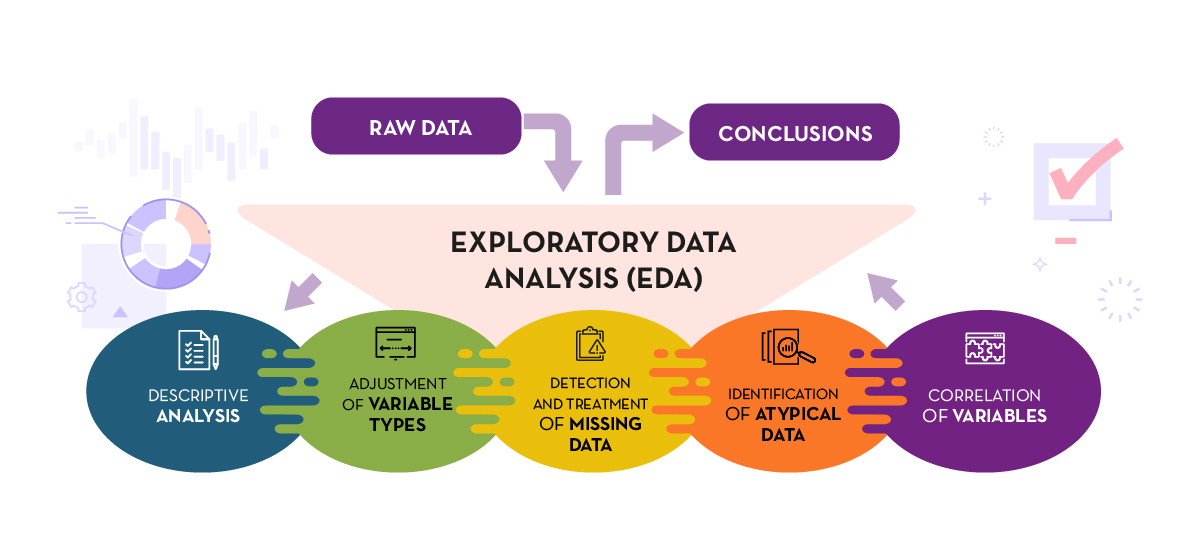

###1. **Data Preprocessing**:
   - Load the dataset
   - Check for missing values and handle them appropriately
   - Convert data types if necessary (e.g., string to datetime for release dates)
   - Create a new column called "preprocessed summary" where you perform the following steps and save the preprocessed summary in that column and later use it for the finetuning and analysis:
  *   Tokenize words
  *   Normalize text
  *   Remove punctuations
  *   Remove stopwords
  *   Removing HTML tags or markup
  *   Lemmatizing or stemming words
  *   Removing numbers or special characters
  *   Removing or replacing non-ASCII characters



In [ ]:
# TODO: Load Dataset
# Load Dataset
df = pd.read_csv('persianmovies.csv')
df = df.dropna()
df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
df['Time'].fillna(0, inplace=True)
df['Time'] = df['Time'].astype('int64')

lower_bound = 1;
df = df[(df['Time'] >= lower_bound)]
df = df[(df['Year'] >= lower_bound)]

In [ ]:
class English_Preprocessor:
    """
    A class for preprocessing text data.

    Attributes:
        stopwords (set): A set of stopwords to be removed from the text.
        nlp (spacy.lang.en.English): A SpaCy English language model for text normalization.

    Methods:
        preprocess(text): Performs preprocessing steps on the given text.
        normalize(text): Normalizes the given text by converting it to lowercase and lemmatizing the words.
        remove_punctuations(text): Removes punctuation from the given text.
        word_tokenize(text): Tokenizes the given text into individual words.
        remove_stopwords(words): Removes stopwords from the given list of words.
        **ADD MORE METHODS**
    """


    def __init__(self):
        """
        Initializes the Preprocessor object.

        TODO: Load the set of stopwords for the English language.
        TODO: Load the SpaCy English language model for text normalization.
        """
        self.stopwords = set(stopwords.words('english'))
        self.nlp = spacy.load('en_core_web_sm')

    def preprocess(self, text):
        """
        Preprocesses the given text by performing normalization, punctuation removal, word tokenization, and stopword removal.

        Args:
            text (str): The input text to be preprocessed.

        Returns:
            str: The preprocessed text.

        TODO: Implement the preprocess method by calling the respective helper methods in the correct order.
        """
        if not isinstance(text, str):
            return ""
        text = self.normalize(text)
        text = self.remove_punctuations(text)
        words = self.word_tokenize(text)
        words = self.remove_stopwords(words)
        return ' '.join(words)

    def normalize(self, text):
        """
        Normalizes the given text by converting it to lowercase and lemmatizing the words.

        Args:
            text (str): The input text to be normalized.

        Returns:
            str: The normalized text.

        TODO: Implement the normalize method using the SpaCy language model to lemmatize the words.
        """
        doc = self.nlp(text.lower())
        return ' '.join([token.lemma_ for token in doc])

    def remove_punctuations(self, text):
        """
        Removes punctuation from the given text.

        Args:
            text (str): The input text from which punctuation needs to be removed.

        Returns:
            str: The text with punctuation removed.

        TODO: Implement the remove_punctuations method using regular expressions.
        """
        return re.sub(r'[^\w\s]', '', text)

    def word_tokenize(self, text):
        """
        Tokenizes the given text into individual words.

        Args:
            text (str): The input text to be tokenized.

        Returns:
            list: A list of tokens (words) in the text.

        TODO: Implement the word_tokenize method using the NLTK word_tokenize function.
        """
        return word_tokenize(text)

    def remove_stopwords(self, words):
        """
        Removes stopwords from the given list of words.

        Args:
            words (list): A list of words from which stopwords need to be removed.

        Returns:
            list: A list of words with stopwords removed.

        TODO: Implement the remove_stopwords method by filtering out words present in the stopwords set.
        """
        return [word for word in words if word not in self.stopwords]

In [ ]:
# TODO: Apply the preprocess method of the Preprocessor object to the English Summary column of the DataFrame
# and store the preprocessed text in a new column named 'Preprocessed English'.
# TODO: Display the updated DataFrame with the new 'Preprocessed English' column.
english_preprocessor = English_Preprocessor()

# Apply preprocessing to the English Summary column
df['Preprocessed English'] = df['Content_2'].apply(english_preprocessor.preprocess)
print(df[['Content_2', 'Preprocessed English']].head())

                                           Content_2  \
0  Jalal, a dropouts philosophy student, realizes...   
1  After the murder of his rich twin brother, Bar...   
2  A man and a woman are have a car accident and ...   
3  Gilda who owns a restaurant has a terrible nig...   
4  Vahid and Marjan are a young couple who have g...   

                                Preprocessed English  
0  jalal dropout philosophy student realize siste...  
1  murder rich twin brother barbod assume identit...  
2  man woman car accident go coma spouse know two...  
3  gilda restaurant terrible night till morning s...  
4  vahid marjan young couple get divorce month ag...  


In [ ]:
from hazm import Normalizer, word_tokenize, stopwords_list

# TODO: Initialize the HAZM Normalizer
normalizer = Normalizer()
# TODO: Load the Persian stopwords list
persian_stopwords = set(stopwords_list())
# TODO: Load desired functions from HAZM (or any other library)
def persian_preprocess_text(text):
    """
    Preprocesses the given Persian text by performing normalization, punctuation removal, word tokenization, and stopword removal.

    Args:
        text (str): The input Persian text to be preprocessed.

    Returns:
        str: The preprocessed Persian text.

    TODO: Implement the following steps:
    1. Remove punctuations from the text using regular expressions.
    2. Normalize the text using the HAZM Normalizer.
    3. Tokenize the normalized text using the HAZM word_tokenize function.
    4. Remove stopwords from the tokenized text using the loaded stopwords list.
    5. Join the remaining tokens back into a string.
    6. ... (what other preprocessing methods you want to have)
    """
    if not isinstance(text, str):
      return ""
    # Remove punctuations
    text = re.sub(r'[^\w\s]', '', text)
    # Normalize the text
    text = normalizer.normalize(text)
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in persian_stopwords]
    return ' '.join(words)

# TODO: Apply the persian_preprocess_text function to the Persian Summary column of the DataFrame
# and store the preprocessed text in a new column named 'Preprocessed Persian'.
# TODO: Display the updated DataFrame with the new 'Preprocessed Persian' column.
df['Preprocessed Persian'] = df['Content_1'].apply(persian_preprocess_text)
print(df[['Content_1', 'Preprocessed Persian']].head())

                                           Content_1  \
0  جلال‌، دانشجوی سابق رشته فلسفه، متوجه می‌شود خ...   
1  «آشفته‌گی» رئالیستی و اجتماعی نیست. یک فیلم اس...   
2  یک تصادف اتومبیل آدم‌هایی را در تقابل با هم قر...   
3  گیلدا ماجرای زنی به نام «گیلدا» را روایت می کن...   
4  این فیلم روایت گر داستان زندگی زوج جوانی به اس...   

                                Preprocessed Persian  
0  جلال دانشجوی سابق رشته فلسفه متوجه خواهرش اختل...  
1            آشفتهگی رئالیستی اجتماعی فیلم عشق جنایت  
2  تصادف اتومبیل آدمهایی تقابل قرار مراقبت مصدومی...  
3  گیلدا ماجرای زنی نام گیلدا روایت صاحب رستوانیس...  
4  فیلم روایت‌گر داستان زندگی زوج جوانی اسم مرجان...  


### 2. **Descriptive Statistics**:
   - Calculate summary statistics (mean, median, mode, standard deviation, range) for numerical variables
   - Determine the count and frequency of unique values for categorical variables

In [ ]:

# Feel free to add any desired methods to the class below this is a suggestion.

class DescriptiveStats:
    def __init__(self, df):
        self.df = df

    def calculate_summary_stats(self, numerical_cols):
        """
        Calculate summary statistics (mean, median, mode, standard deviation, range) for numerical variables.

        Args:
            numerical_cols (list): A list of column names containing numerical data.

        Returns:
            None (prints the summary statistics for each numerical column)

        TODO:
        1. Ensure that the specified columns are treated as numerical data types.
        2. Calculate and print the mean, median, mode, standard deviation, and range for each numerical column.
        """
        for col in numerical_cols:
          # print(self.df[col])
          if pd.api.types.is_numeric_dtype(self.df[col]):
              print(f"Summary statistics for {col}:")
              mean = self.df[col].mean()
              median = self.df[col].median()
              mode = self.df[col].mode().iloc[0] if not self.df[col].mode().empty else np.nan
              std_dev = self.df[col].std()
              data_range = self.df[col].max() - self.df[col].min()

              print(f"Mean: {mean}")
              print(f"Median: {median}")
              print(f"Mode: {mode}")
              print(f"Standard Deviation: {std_dev}")
              print(f"Range: {data_range}\n")
          else:
              print(f"{col} is not a numerical column.\n")

    def count_unique_values(self, categorical_cols):
        """
        Determine the count and frequency of unique values for categorical variables.

        Args:
            categorical_cols (list): A list of column names containing categorical data.

        Returns:
            None (prints the count and frequency of unique values for each categorical column)

        TODO:
        1. Iterate through each categorical column.
        2. Calculate the count and frequency of unique values for each column.
        3. Print the unique values, their counts, and their frequencies.
        """
        for col in categorical_cols:
          if pd.api.types.is_categorical_dtype(self.df[col]) or pd.api.types.is_object_dtype(self.df[col]):
              print(f"Unique values count and frequency for {col}:")
              value_counts = self.df[col].value_counts()
              for value, count in value_counts.items():
                  print(f"Value: {value}, Count: {count}, Frequency: {count / len(self.df):.2%}")
              print("\n")
          else:
              print(f"{col} is not a categorical column.\n")

# Example usage
numerical_cols = ['Time', 'Year','Score']  # replace with actual numerical columns from your dataset
categorical_cols = ['Genre']
# Assuming you have a pandas DataFrame named 'df'
stats = DescriptiveStats(df)

# TODO: Call the calculate_summary_stats method with the numerical_cols list
stats.calculate_summary_stats(numerical_cols)

# TODO: Call the count_unique_values method with the categorical_cols list
stats.count_unique_values(categorical_cols)

Summary statistics for Time:
Mean: 90.96868250539957
Median: 90.0
Mode: 90
Standard Deviation: 12.173169068950385
Range: 140

Summary statistics for Year:
Mean: 2006.57343412527
Median: 2008.0
Mode: 2017
Standard Deviation: 9.958644566377476
Range: 51

Summary statistics for Score:
Mean: 6.372354211663066
Median: 6.55
Mode: 8.0
Standard Deviation: 1.5552777688188828
Range: 10.0

Unique values count and frequency for Genre:
Value: Drama, Count: 537, Frequency: 57.99%
Value: Comedy, Count: 177, Frequency: 19.11%
Value: Action, Count: 55, Frequency: 5.94%
Value: Crime, Count: 46, Frequency: 4.97%
Value: Adventure, Count: 37, Frequency: 4.00%
Value: Family, Count: 17, Frequency: 1.84%
Value: War, Count: 16, Frequency: 1.73%
Value: Human Interest & Society, Count: 8, Frequency: 0.86%
Value: History, Count: 7, Frequency: 0.76%
Value: Horror, Count: 7, Frequency: 0.76%
Value: Romance, Count: 6, Frequency: 0.65%
Value: Mystery, Count: 4, Frequency: 0.43%
Value: Arts & Literature, Count: 3, Fre

###3. **Data Visualization**:
   - Plot histograms or density plots for numerical variables
   - Create bar plots or pie charts for categorical variables
   - Generate scatter plots or correlation matrices to explore relationships

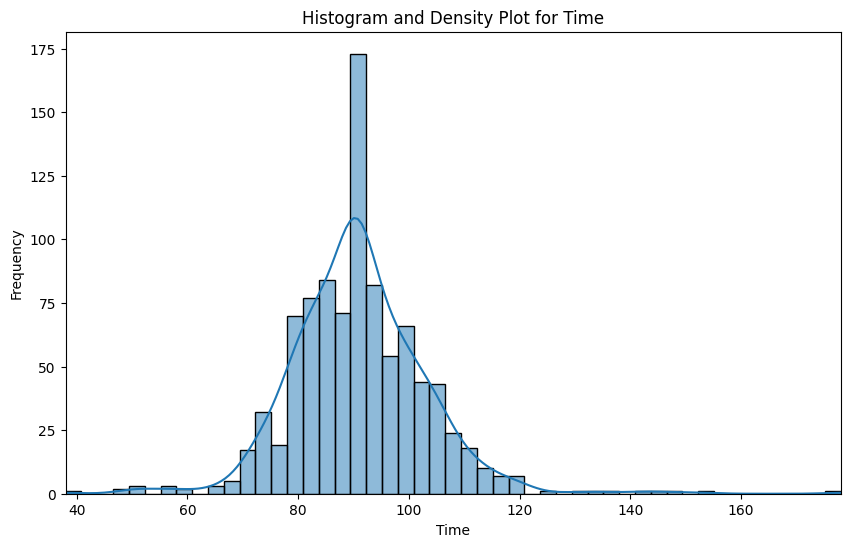

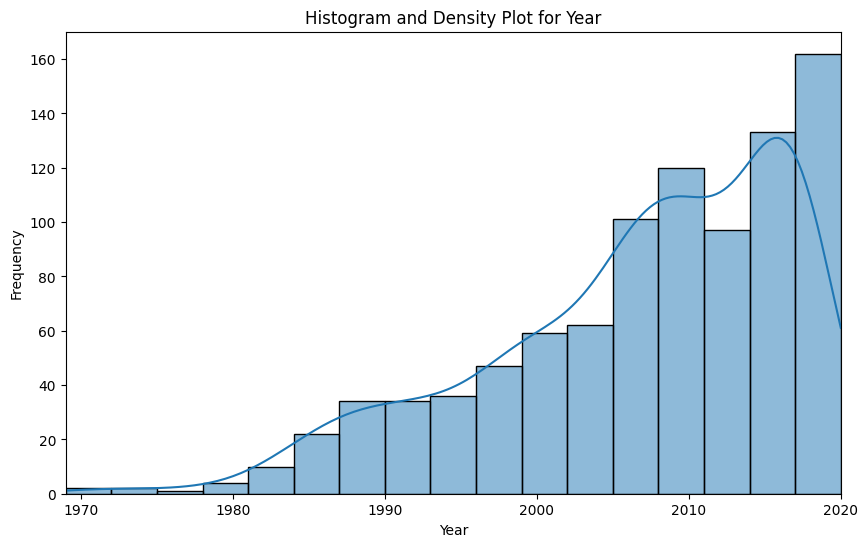

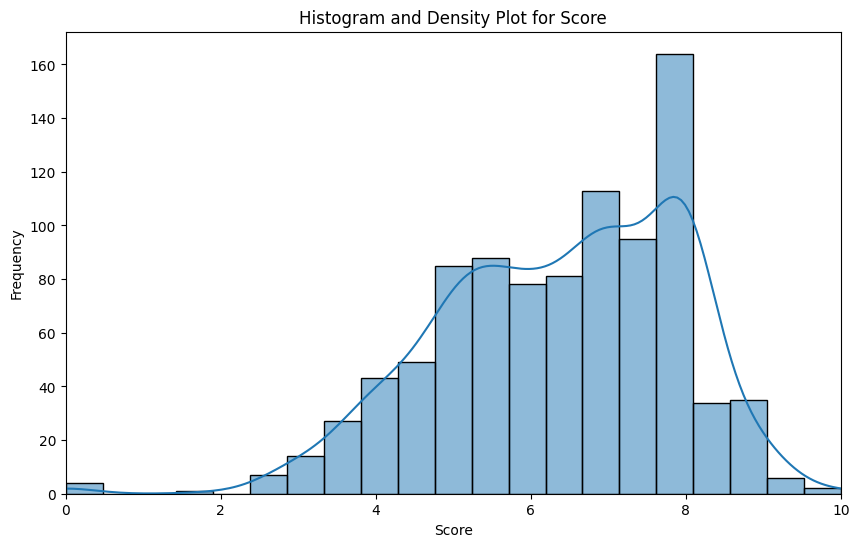

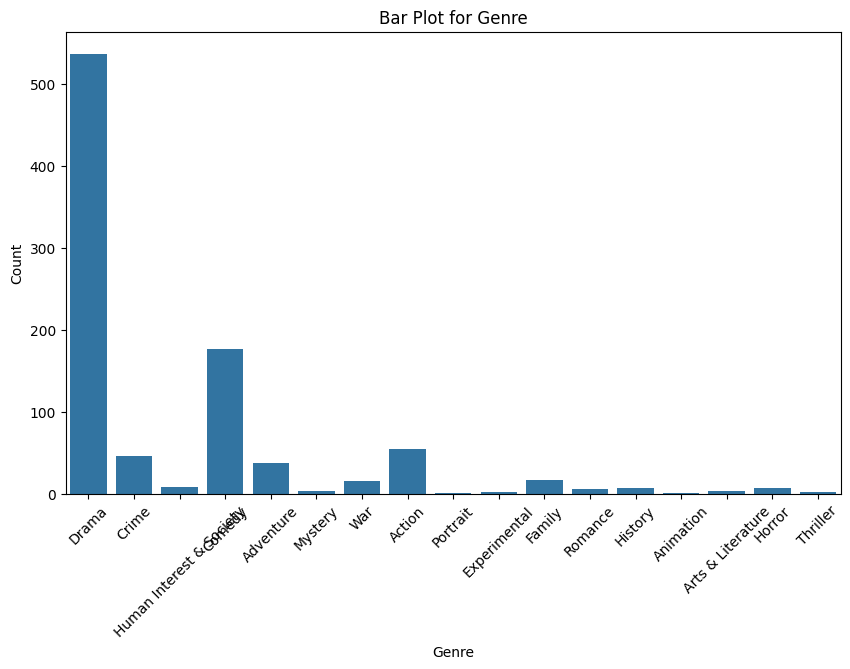

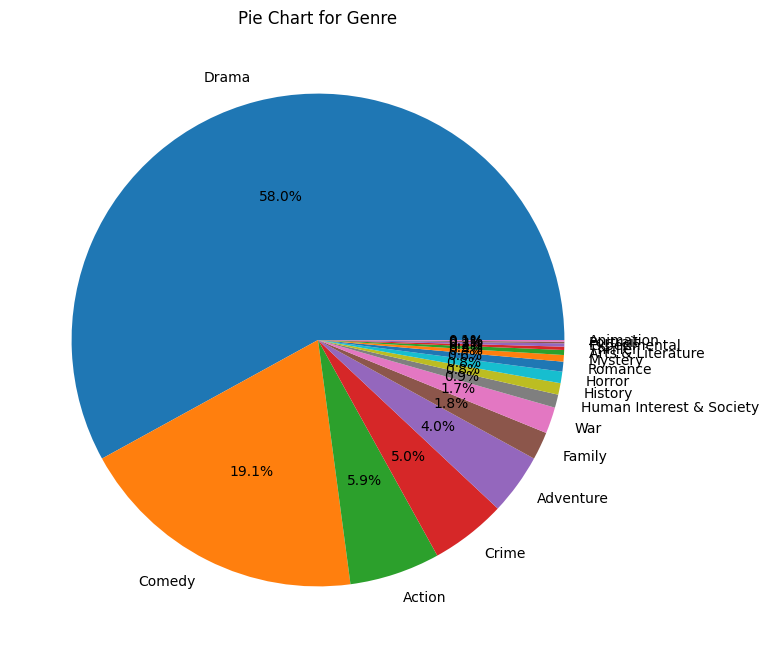

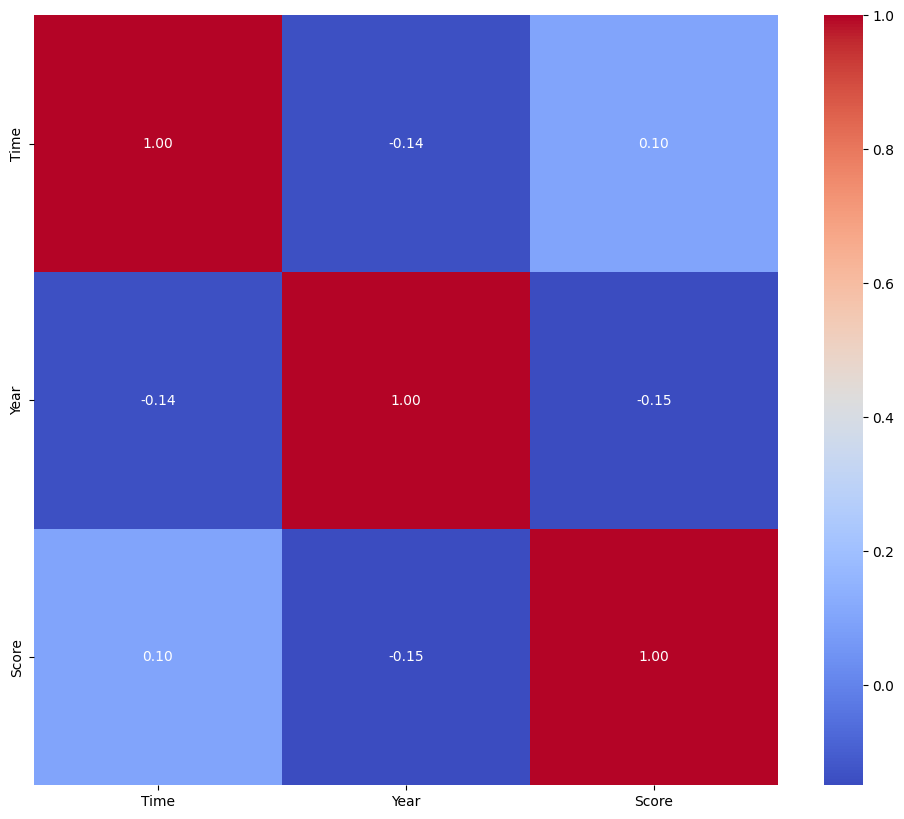

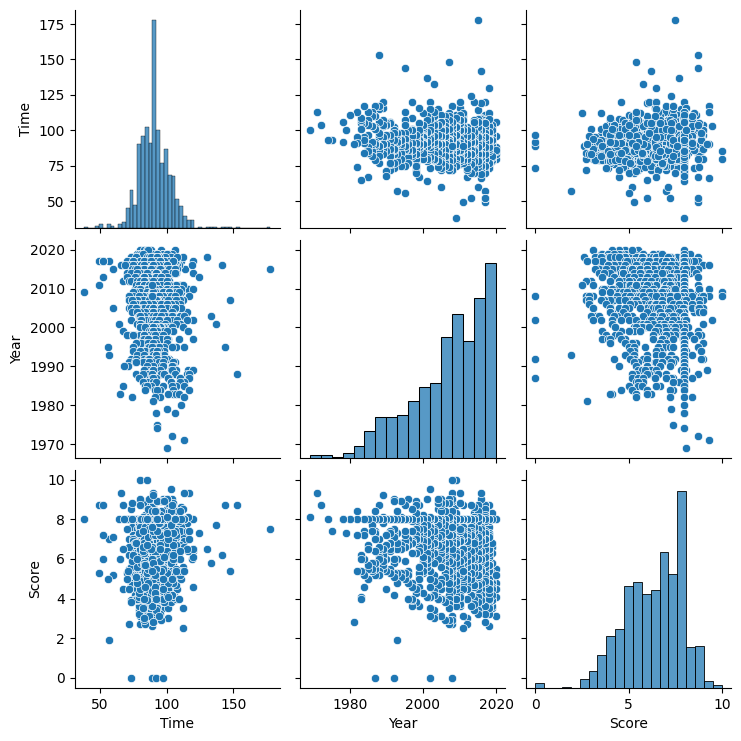

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feel free to add any desired methods to the class below this is a suggestion.
# Have fun trying to visualize your data

class DataVisualization:
    def __init__(self, df):
        self.df = df

    def plot_histograms(self, numerical_cols):
        """
        Plot histograms or density plots for numerical variables.

        Args:
            numerical_cols (list): A list of column names containing numerical data.

        Returns:
            None (displays the plots)

        TODO:
        1. Iterate through each numerical column.
        2. Create a histogram or density plot for each column using Matplotlib or Seaborn.
        3. Set appropriate titles and labels for the plots.
        4. Display the plots.
        """
        for col in numerical_cols:
            plt.figure(figsize=(10, 6))
            # Get min and max values for the range
            data_min = self.df[col].min()
            data_max = self.df[col].max()
            sns.histplot(self.df[col], kde=True, binrange=(data_min, data_max))
            plt.title(f'Histogram and Density Plot for {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.xlim(data_min, data_max)  # Set the x-axis limit to the data range
            plt.show()

    def plot_categorical(self, categorical_cols):
        """
        Create bar plots or pie charts for categorical variables.

        Args:
            categorical_cols (list): A list of column names containing categorical data.

        Returns:
            None (displays the plots)

        TODO:
        1. Iterate through each categorical column.
        2. Create a bar plot or pie chart for each column using Matplotlib or Seaborn.
        3. Set appropriate titles and labels for the plots.
        4. Display the plots.
        """
        for col in categorical_cols:
          plt.figure(figsize=(10, 6))
          sns.countplot(x=col, data=self.df)
          plt.title(f'Bar Plot for {col}')
          plt.xlabel(col)
          plt.ylabel('Count')
          plt.xticks(rotation=45)
          plt.show()

          plt.figure(figsize=(8, 8))
          self.df[col].value_counts().plot.pie(autopct='%1.1f%%')
          plt.title(f'Pie Chart for {col}')
          plt.ylabel('')

          plt.show()

    def plot_relationships(self, numerical_cols):
        """
        Generate scatter plots or correlation matrices to explore relationships between numerical variables.

        Args:
            numerical_cols (list): A list of column names containing numerical data.

        Returns:
            None (displays the plots)

        TODO:
        1. Create a scatter plot matrix or correlation matrix for the numerical columns using Matplotlib or Seaborn.
        2. Set appropriate titles and labels for the plots.
        3. Display the plots.
        """
        plt.figure(figsize=(12, 10))
        correlation_matrix = self.df[numerical_cols].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
        # plt.title('Correlation Matrix')
        plt.show()

        sns.pairplot(self.df[numerical_cols])
        # plt.title('Scatter Plot Matrix')
        plt.show()

# Example usage
numerical_cols = ['Time', 'Year','Score']  # replace with actual numerical columns from your dataset
categorical_cols = ['Genre']


# Assuming you have a pandas DataFrame named 'df'
viz = DataVisualization(df)

# TODO: Call the plot_histograms method with the numerical_cols list
viz.plot_histograms(numerical_cols)

# TODO: Call the plot_categorical method with the categorical_cols list
viz.plot_categorical(categorical_cols)

# TODO: Call the plot_relationships method with the numerical_cols list
viz.plot_relationships(numerical_cols)

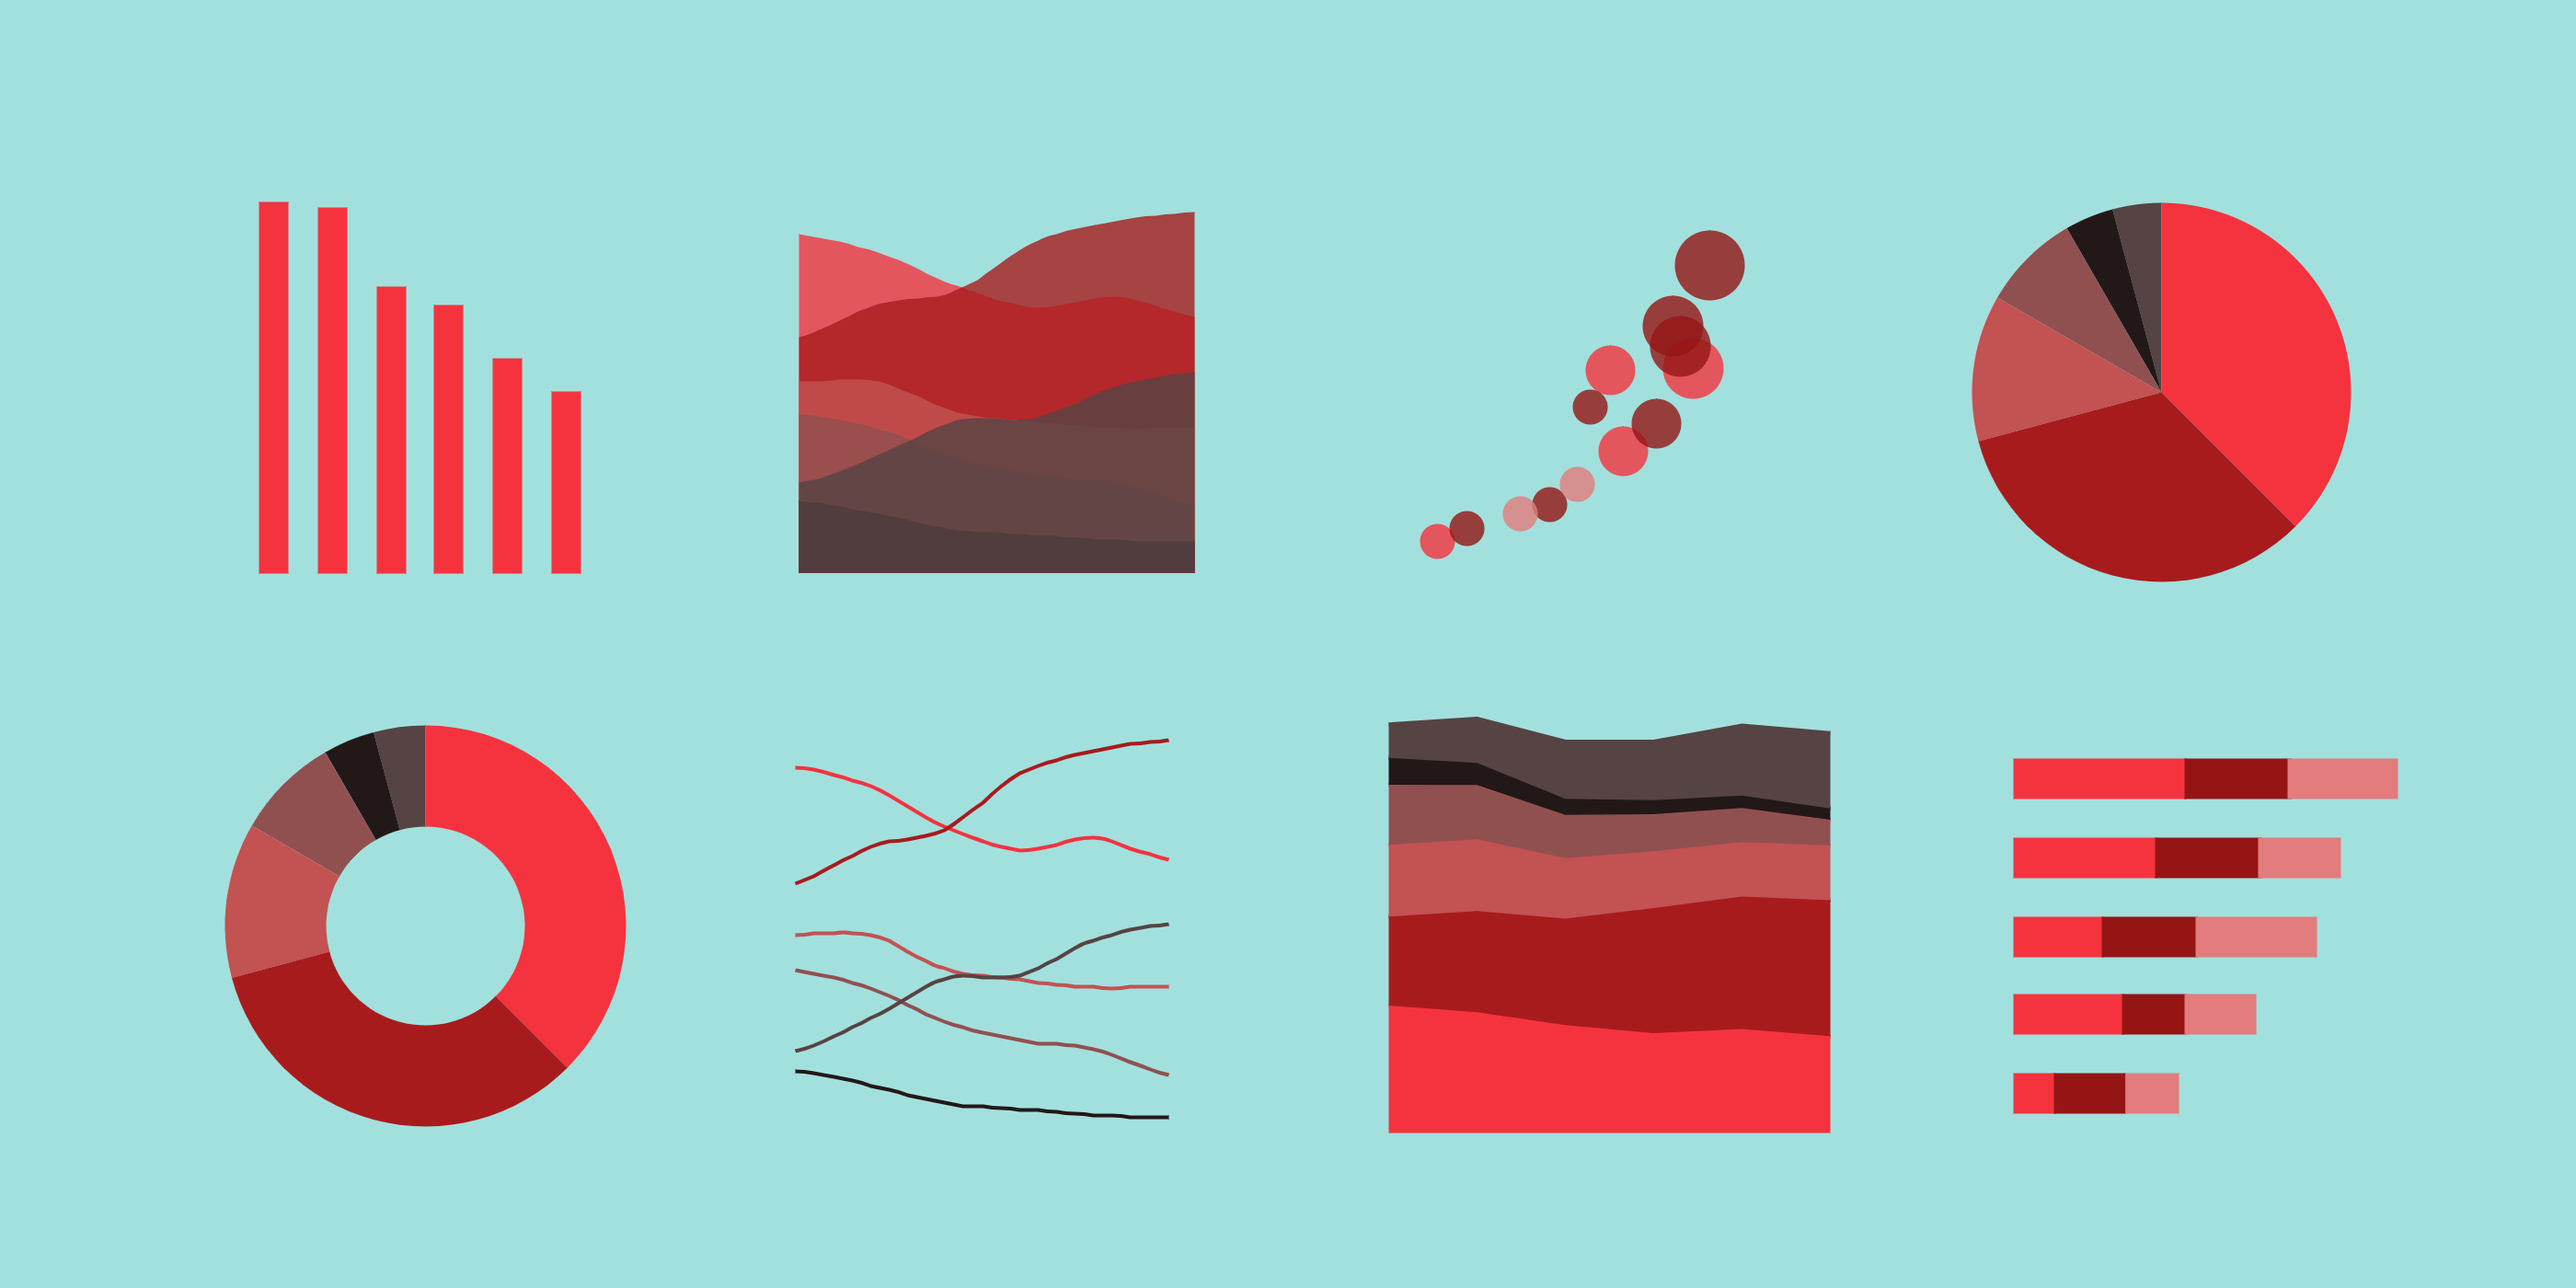

###4. **Genre Analysis**:
   - Create a word cloud or bar plot for genre distribution (you can use bidi library for persian text)
   - Obtain the 10 most frequently occurring words for each genre, based on both the initial summaries and the preprocessed summaries.
   - Analyze the distribution of movies across genres
   - Explore the relationship between genres and other variables

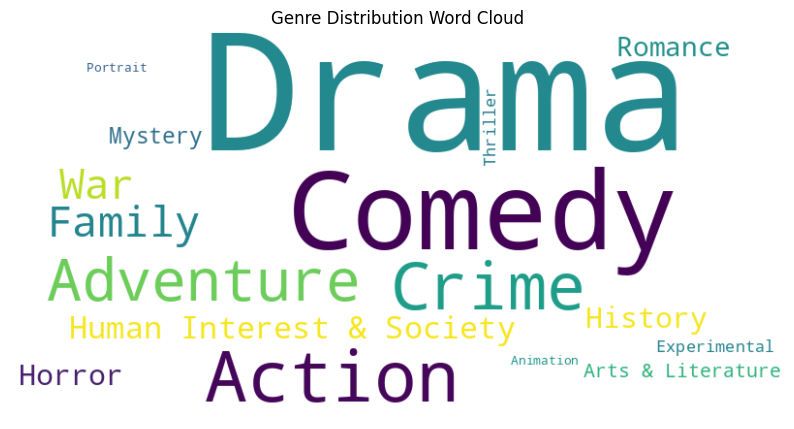

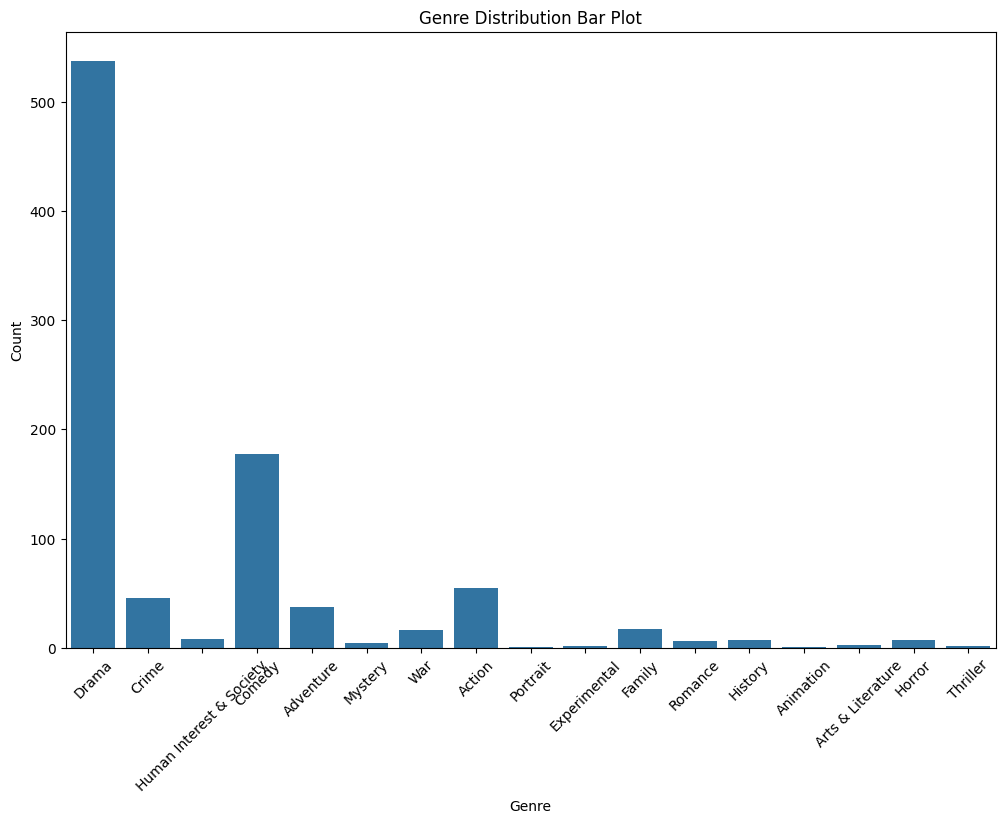

Top 10 frequent words for genre 'Drama': [('life', 356), ('find', 277), ('young', 237), ('go', 236), ('family', 232), ('one', 221), ('man', 199), ('get', 196), ('take', 192), ('father', 181)]
Top 10 frequent words for genre 'Crime': [('get', 33), ('find', 32), ('life', 31), ('go', 30), ('friend', 26), ('kill', 21), ('girl', 20), ('reza', 20), ('woman', 19), ('murder', 18)]
Top 10 frequent words for genre 'Human Interest & Society': [('iran', 9), ('work', 7), ('rice', 7), ('website', 6), ('karafilmir', 6), ('gold', 5), ('help', 5), ('one', 5), ('group', 5), ('year', 5)]
Top 10 frequent words for genre 'Comedy': [('get', 105), ('man', 80), ('find', 78), ('go', 76), ('family', 73), ('life', 67), ('one', 67), ('story', 66), ('marry', 59), ('young', 57)]
Top 10 frequent words for genre 'Adventure': [('find', 31), ('man', 24), ('life', 23), ('story', 21), ('family', 20), ('old', 18), ('young', 17), ('get', 17), ('go', 17), ('girl', 16)]
Top 10 frequent words for genre 'Mystery': [('siavash',

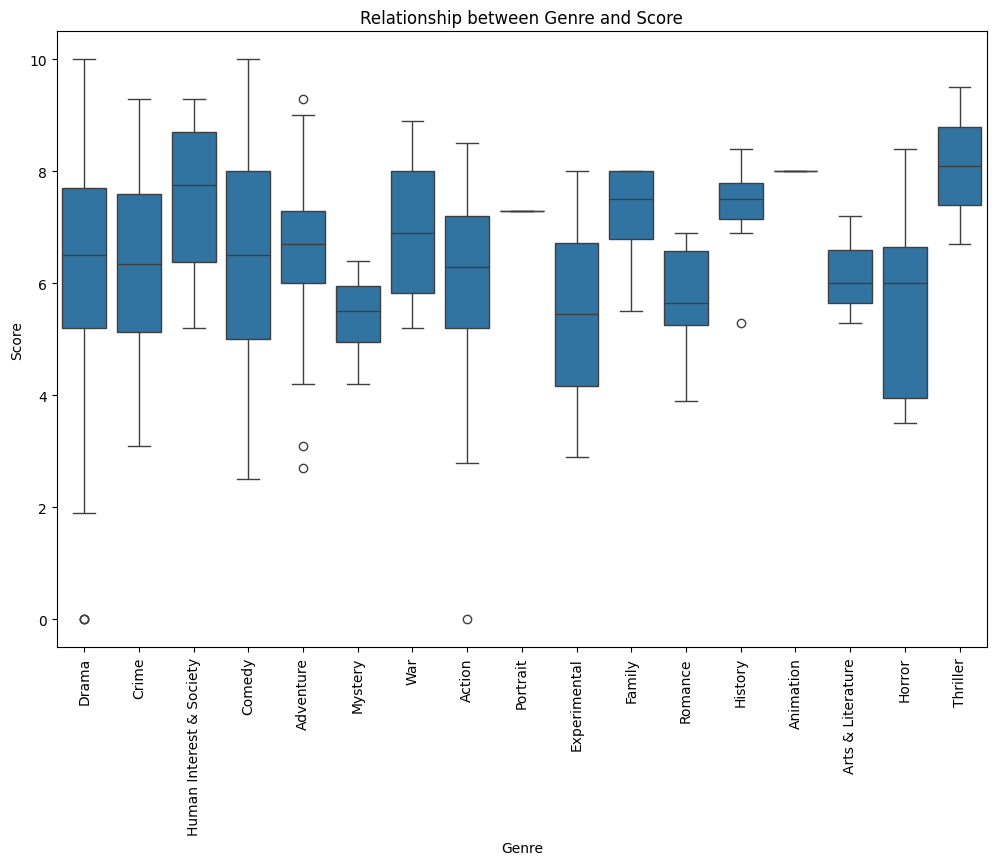

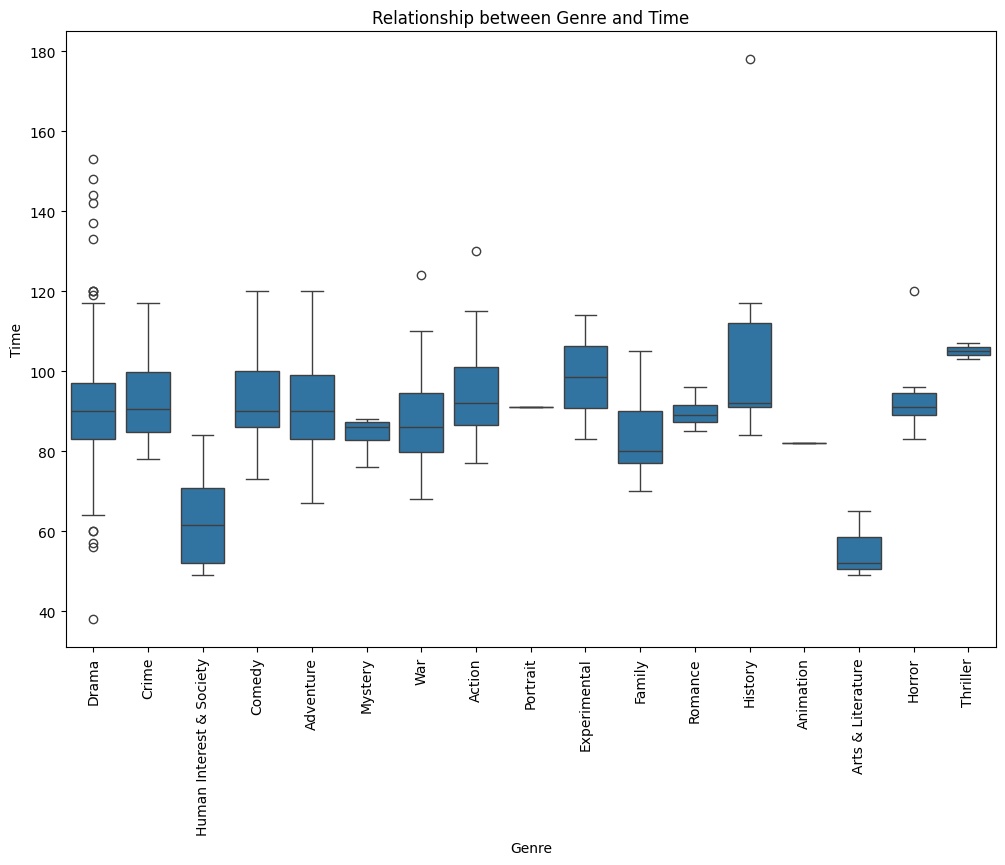

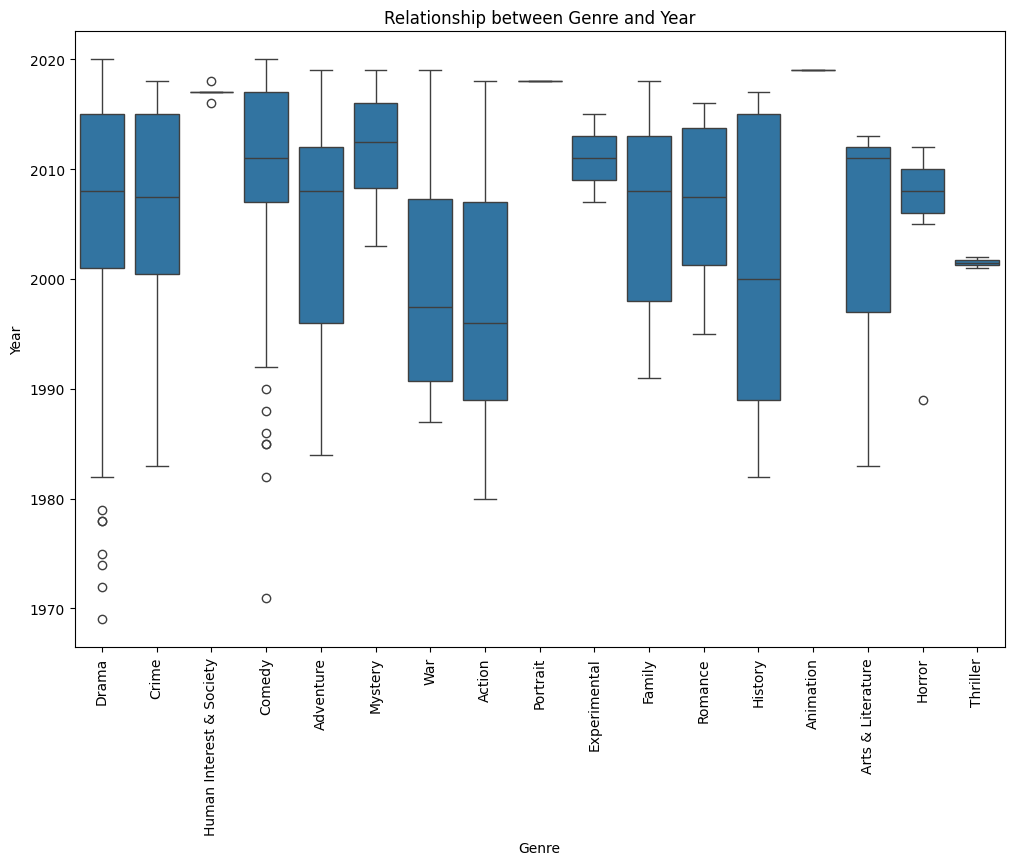

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from bidi import algorithm as bidi_algorithm
import seaborn as sns
from collections import Counter
import numpy as np

class GenreAnalysis:
    def __init__(self, df):
        self.df = df

    def visualize_genre_distribution(self, column):
        """
        Create a word cloud or bar plot for genre distribution.

        Args:
            column (str): The column name containing the genre information.

        Returns:
            None (displays the plot)

        TODO:
        1. Check if the data is in Persian or English.
        2. If the data is in Persian, use the bidi library to handle right-to-left text direction.
        3. Create a word cloud or bar plot for the genre distribution using Matplotlib or Seaborn.
        4. Set appropriate titles and labels for the plot.
        5. Display the plot.
        """
        genres = self.df[column].dropna()
        genre_list = [genre for sublist in genres.str.split('|') for genre in sublist]
        genre_freq = Counter(genre_list)

        plt.figure(figsize=(10, 6))
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_freq)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Genre Distribution Word Cloud')
        plt.show()

        plt.figure(figsize=(12, 8))
        sns.barplot(x=list(genre_freq.keys()), y=list(genre_freq.values()))
        plt.title('Genre Distribution Bar Plot')
        plt.xlabel('Genre')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

    def frequent_words_by_genre(self, content_column, genre_column):
        """
        Obtain the 10 most frequently occurring words for each genre, based on both the initial summaries and the preprocessed summaries.

        Args:
            content_column (str): The column name containing the text data.
            genre_column (str): The column name containing the genre information.

        Returns:
            None (prints the top 10 most frequent words for each genre)

        TODO:
        1. Group the data by genre.
        2. For each genre:
            a. Get the top 10 most frequent words from the initial summaries.
            b. Get the top 10 most frequent words from the preprocessed summaries (if available).
            c. Print the top 10 frequent words for both cases.
        """
        genres = self.df[genre_column].dropna().unique()
        for genre in genres:
          genre_df = self.df[self.df[genre_column].str.contains(genre, na=False)]
          all_words = ' '.join(genre_df[content_column].dropna()).split()
          word_freq = Counter(all_words)
          most_common_words = word_freq.most_common(10)
          print(f"Top 10 frequent words for genre '{genre}': {most_common_words}")

    def analyze_genre_distribution(self, genre_column):
        """
        Analyze the distribution of movies across genres.

        Args:
            genre_column (str): The column name containing the genre information.

        Returns:
            None (prints the analysis of genre distribution)

        TODO:
        1. Calculate the count of movies for each genre.
        2. Determine the most and least popular genres based on the movie count.
        3. Print the analysis of genre distribution, including the most and least popular genres.
        """
        genres = self.df[genre_column].dropna()
        genre_list = [genre for sublist in genres.str.split('|') for genre in sublist]
        genre_freq = Counter(genre_list)

        most_common_genre = genre_freq.most_common(1)[0]
        least_common_genre = genre_freq.most_common()[-1]

        print(f"Most common genre: {most_common_genre}")
        print(f"Least common genre: {least_common_genre}")

    def explore_genre_relationships(self, genre_column, other_columns):
        """
        Explore the relationship between genres and other variables.

        Args:
            genre_column (str): The column name containing the genre information.
            other_columns (list): A list of column names to explore relationships with.

        Returns:
            None (displays plots or prints analysis)

        TODO:
        1. Iterate through each column in other_columns.
        2. Generate appropriate plots or calculations to explore the relationship between genres and the selected column.
        3. Set appropriate titles and labels for the plots.
        4. Display the plots or print the analysis.
        """
        for col in other_columns:
          plt.figure(figsize=(12, 8))
          sns.boxplot(x=genre_column, y=col, data=self.df)
          plt.title(f'Relationship between {genre_column} and {col}')
          plt.xlabel('Genre')
          plt.ylabel(col)
          plt.xticks(rotation=90)
          plt.show()


genre_column = 'Genre'  # replace with actual genre column name
content_column = 'Preprocessed English'  # replace with actual content column name
other_columns = ['Score', 'Time','Year']
genre_analysis = GenreAnalysis(df)

# TODO: Call the visualize_genre_distribution method with the genre_column
genre_analysis.visualize_genre_distribution(genre_column)

# TODO: Call the frequent_words_by_genre method with the content_column and genre_column
genre_analysis.frequent_words_by_genre(content_column, genre_column)

# TODO: Call the analyze_genre_distribution method with the genre_column
genre_analysis.analyze_genre_distribution(genre_column)

# TODO: Call the explore_genre_relationships method with the genre_column and other_columns
genre_analysis.explore_genre_relationships(genre_column, other_columns)

In one paragraph, briefly explain what you found interesting in your analysis and whether this analysis prompted you to take any further steps; if so, explain those additional steps.



###5. **Time-based Analysis**:
   - Plot line or bar charts for movie releases over time
   - Investigate trends or patterns in movie releases
   - Analyze the relationship between release year and other variables

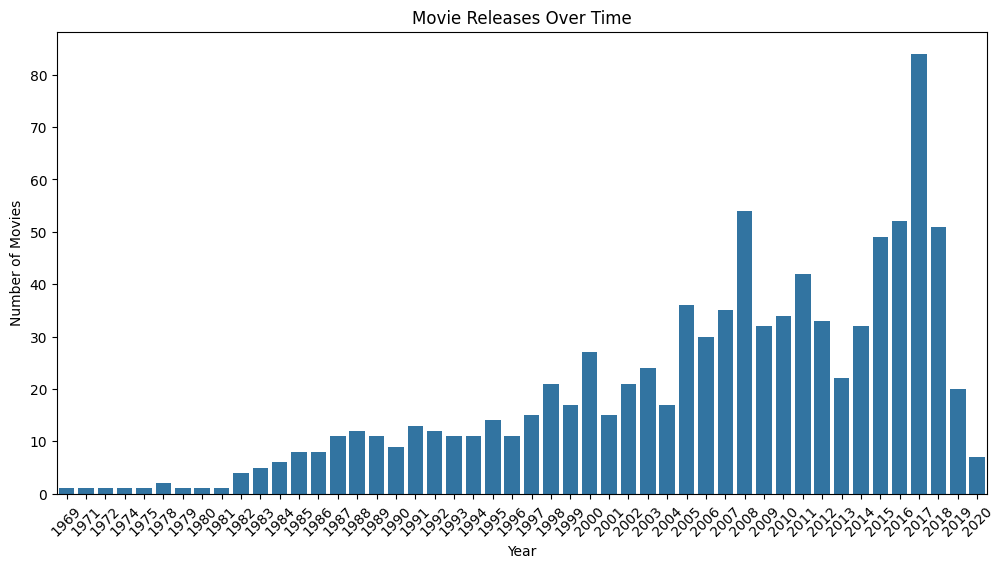

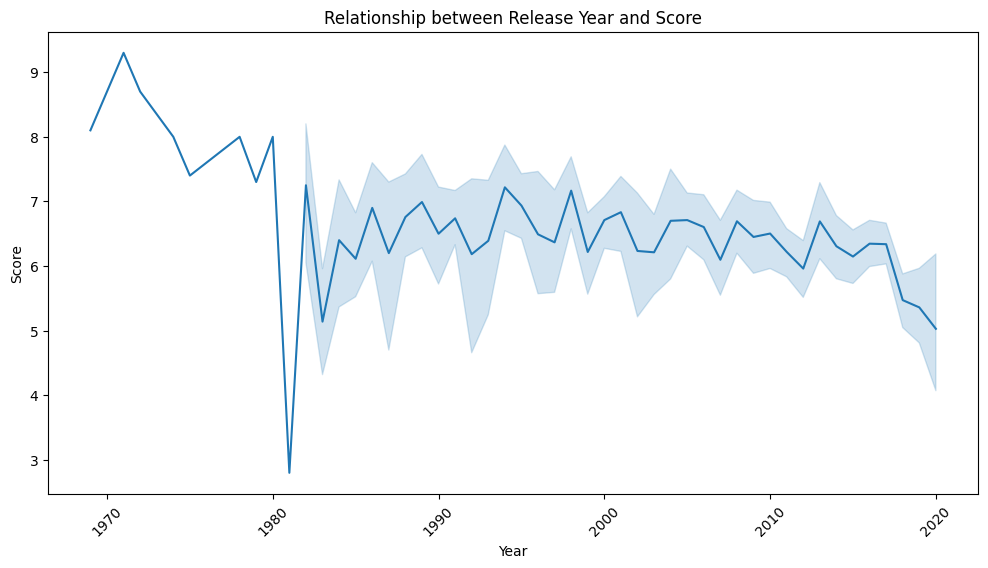

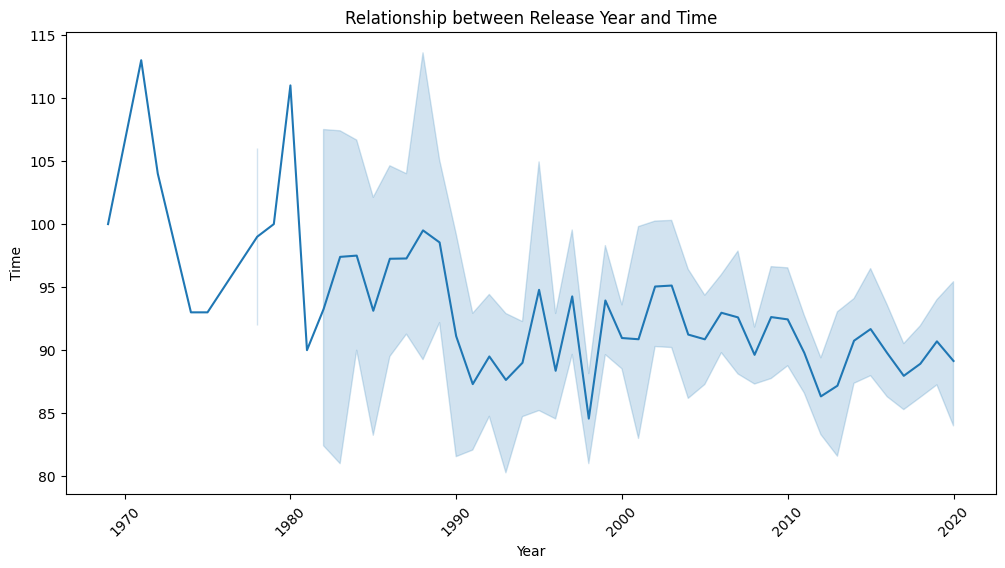

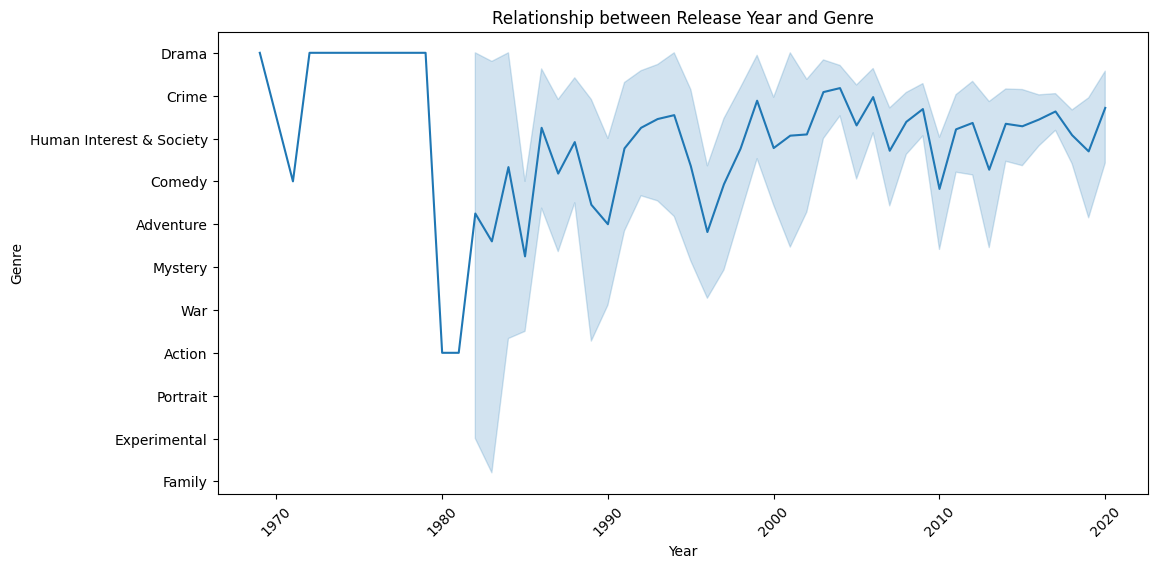

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

class TimeAnalysis:
    def __init__(self, df):
        self.df = df

    def plot_movie_releases(self, time_column):
        """
        Plot line or bar charts for movie releases over time.

        Args:
            time_column (str): The column name containing the time or release year information.

        Returns:
            None (displays the plot)

        TODO:
        1. Check if the time_column contains continuous time data (e.g., years) or discrete time data (e.g., decades).
        2. Create a line or bar chart to show the distribution of movie releases over time using Matplotlib or Seaborn.
        3. Set appropriate titles and labels for the plot.
        4. Display the plot.
        """

        # Plotting the distribution of movie releases over time
        plt.figure(figsize=(12, 6))
        sns.countplot(data=self.df, x='Year')
        plt.xticks(rotation=45)
        plt.title('Movie Releases Over Time')
        plt.xlabel('Year')
        plt.ylabel('Number of Movies')
        plt.show()

    def explore_time_relationships(self, time_column, other_columns):
        """
        Analyze the relationship between release time and other variables.

        Args:
            time_column (str): The column name containing the time or release year information.
            other_columns (list): A list of column names to explore relationships with.

        Returns:
            None (displays plots or prints analysis)

        TODO:
        1. Iterate through each column in other_columns.
        2. Generate appropriate plots or calculations to explore the relationship between release time and the selected column.
        3. Set appropriate titles and labels for the plots.
        4. Display the plots or print the analysis.
        """
        # self.df[time_column] = pd.to_datetime(self.df[time_column])

        # # Extract year from the time_column
        # self.df['year'] = self.df[time_column].dt.year

        for col in other_columns:
            plt.figure(figsize=(12, 6))
            sns.lineplot(data=self.df, x='Year', y=col)
            plt.title(f'Relationship between Release Year and {col}')
            plt.xlabel('Year')
            plt.ylabel(col)
            plt.xticks(rotation=45)
            plt.show()


time_column = 'Year'  # replace with actual genre column name
other_columns = ['Score','Time','Genre']
# Assuming you have a pandas DataFrame named 'df'
time_analysis = TimeAnalysis(df)

# TODO: Call the plot_movie_releases method with the time_column
time_analysis.plot_movie_releases(time_column)

# TODO: Call the explore_time_relationships method with the time_column and other_columns
time_analysis.explore_time_relationships(time_column, other_columns)

In one paragraph, briefly explain what you found interesting in your analysis.



###6. **Rating Analysis**:
   - Visualize the distribution of ratings
   - Obtain the 10 most frequently occurring words for each Rating, based on both the initial summaries and the preprocessed summaries.
   - Explore the relationship between ratings and other variables


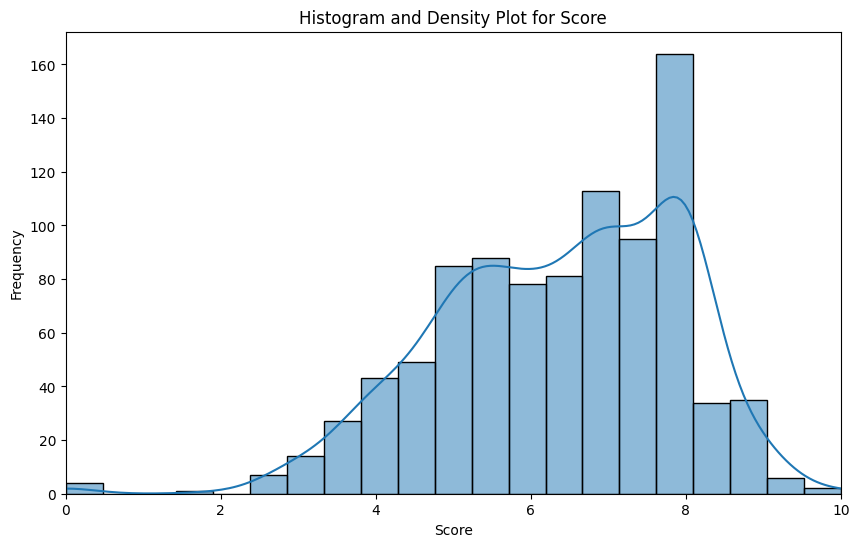

Top 10 words for Rating 4.8:
man: 10
story: 10
find: 10
go: 9
love: 7
house: 6
wife: 6
take: 6
amir: 6
friend: 5
Top 10 words for Rating 3.8:
father: 10
life: 7
young: 5
man: 5
two: 4
come: 3
film: 3
daughter: 3
family: 3
stranger: 3
Top 10 words for Rating 4.4:
bijan: 19
zohreh: 8
amir: 7
father: 6
love: 5
find: 4
equation: 4
alimorad: 4
go: 3
come: 3
Top 10 words for Rating 5.6:
find: 13
year: 12
life: 12
iran: 10
abdol: 10
azim: 10
hasani: 10
two: 9
film: 8
one: 8
Top 10 words for Rating 5.2:
father: 15
daughter: 13
family: 11
friend: 10
get: 9
day: 9
return: 9
man: 9
wife: 9
one: 8
Top 10 words for Rating 3.1:
get: 9
girl: 7
mitra: 7
money: 6
fox: 5
one: 5
woman: 5
film: 5
nazanin: 5
roya: 5
Top 10 words for Rating 5.5:
life: 12
reza: 7
story: 6
old: 5
problem: 5
go: 5
day: 4
become: 4
mother: 4
parsa: 4
Top 10 words for Rating 4.5:
family: 14
one: 12
reza: 10
find: 9
live: 8
mashreghi: 8
woman: 7
life: 7
I: 7
get: 7
Top 10 words for Rating 4.1:
esi: 14
tofigh: 13
get: 11
rana: 9
s

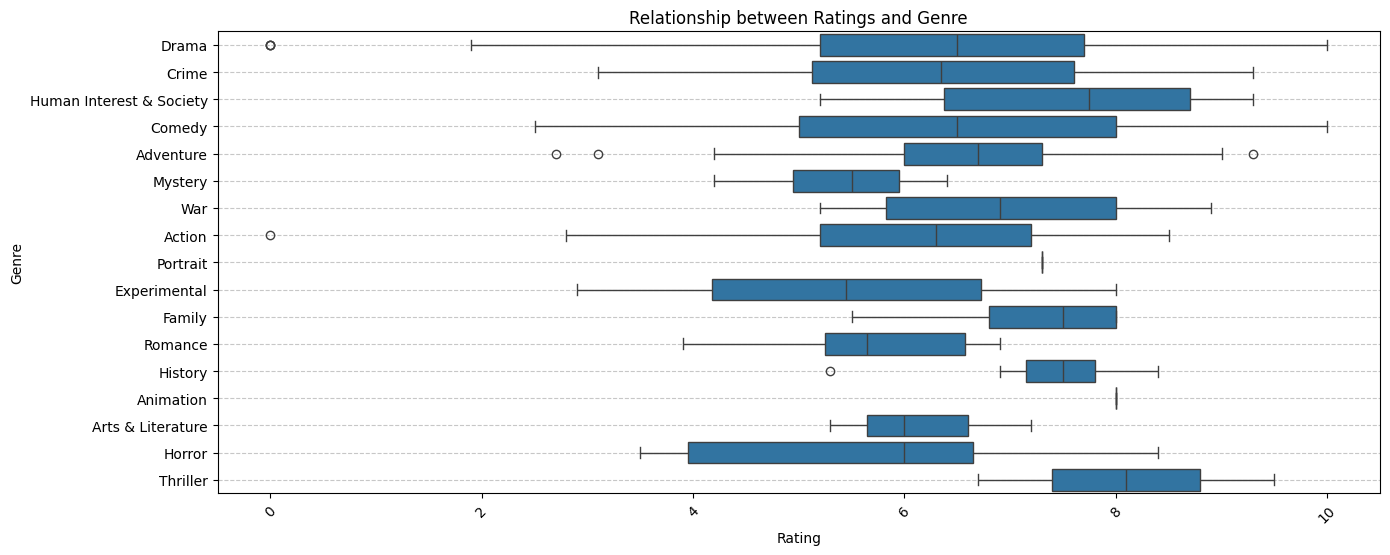

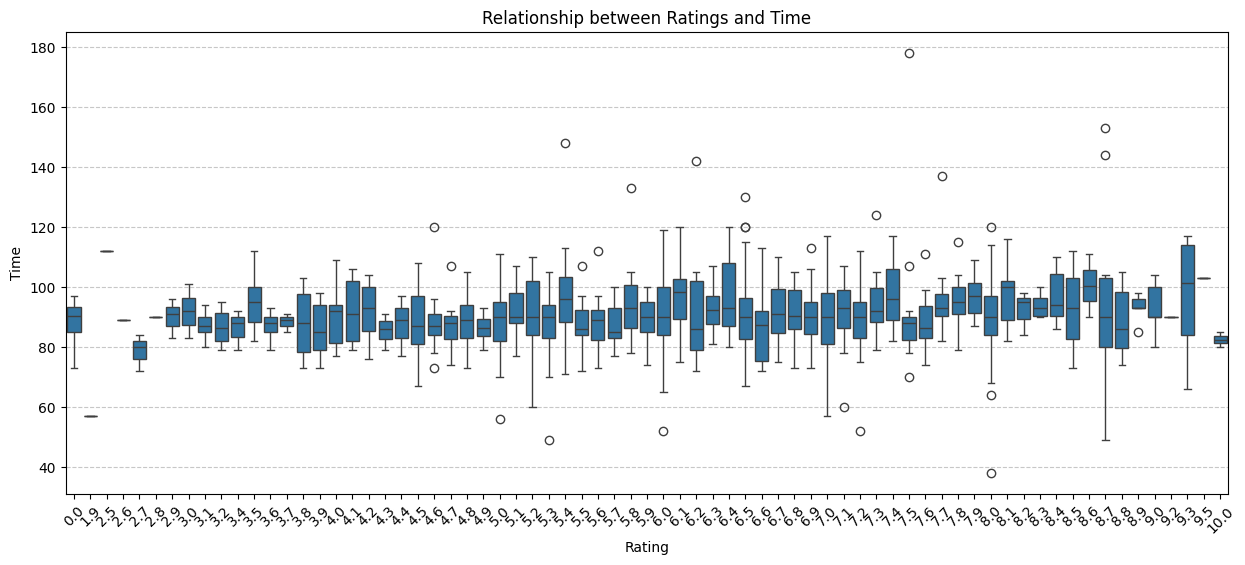

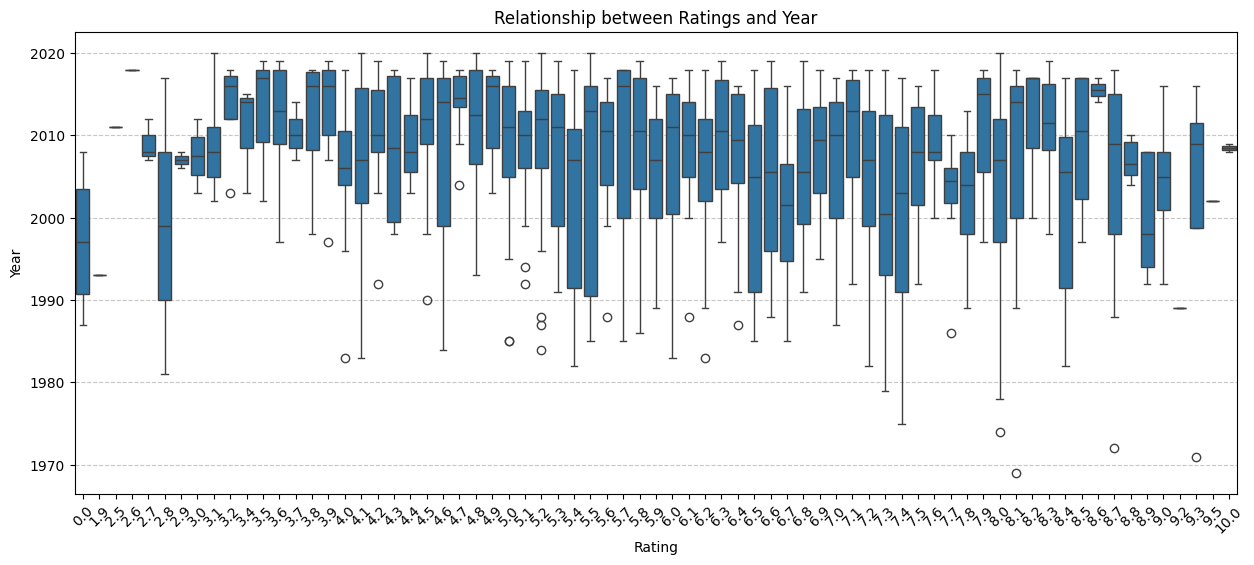

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

class RatingAnalysis:
    def __init__(self, df):
        self.df = df

    def visualize_rating_distribution(self, rating_column):
        """
        Visualize the distribution of ratings.

        Args:
            rating_column (str): The column name containing the rating information.

        Returns:
            None (displays the plot)

        TODO:
        1. Create a histogram or density plot to visualize the distribution of ratings using Matplotlib or Seaborn.
        2. Set appropriate titles and labels for the plot.
        3. Display the plot.
        """
        plt.figure(figsize=(10, 6))
        # Get min and max values for the range
        data_min = self.df[rating_column].min()
        data_max = self.df[rating_column].max()
        sns.histplot(self.df[rating_column], kde=True, binrange=(data_min, data_max))
        plt.title(f'Histogram and Density Plot for {rating_column}')
        plt.xlabel(rating_column)
        plt.ylabel('Frequency')
        plt.xlim(data_min, data_max)  # Set the x-axis limit to the data range
        plt.show()


    def frequent_words_by_rating(self, content_column, rating_column, n=10):
        """
        Obtain the 10 most frequently occurring words for each rating, based on both the initial summaries and the preprocessed summaries.

        Args:
            content_column (str): The column name containing the text data.
            rating_column (str): The column name containing the rating information.
            n (int): The number of most frequent words to obtain (default is 10).

        Returns:
            None (prints the top n frequent words for each rating)

        TODO:
        1. Group the data by rating.
        2. For each rating:
            a. Get the top n most frequent words from the initial summaries.
            b. Get the top n most frequent words from the preprocessed summaries (if available).
            c. Print the top n frequent words for both cases.
        """


        for rating in self.df[rating_column].unique():
          content = ' '.join(self.df[self.df[rating_column] == rating][content_column])
          words = content.split()
          word_counts = Counter(words)
          top_words = word_counts.most_common(n)
          print(f"Top {n} words for Rating {rating}:")
          for word, count in top_words:
              print(f"{word}: {count}")

    def explore_rating_relationships(self, rating_column, other_columns):
        """
        Explore the relationship between ratings and other variables.

        Args:
            rating_column (str): The column name containing the rating information.
            other_columns (list): A list of column names to explore relationships with.

        Returns:
            None (displays plots or prints analysis)

        TODO:
        1. Iterate through each column in other_columns.
        2. Generate appropriate plots or calculations to explore the relationship between ratings and the selected column.
        3. Set appropriate titles and labels for the plots.
        4. Display the plots or print the analysis.
        """
        for col in other_columns:
          plt.figure(figsize=(15, 6))
          ax = sns.boxplot(data=self.df, x=rating_column, y=col)
          plt.title(f'Relationship between Ratings and {col}')
          plt.xlabel('Rating')
          plt.ylabel(col)
          plt.xticks(rotation=45)
          plt.grid(axis='y', linestyle='--', alpha=0.7)
          plt.show()


rating_column = 'Score'  # replace with actual genre column name
content_column = 'Preprocessed English'  # replace with actual content column name
other_columns = ['Genre', 'Time','Year']
rating_analysis = RatingAnalysis(df)

# TODO: Call the visualize_rating_distribution method with the rating_column
rating_analysis.visualize_rating_distribution(rating_column)

# TODO: Call the frequent_words_by_rating method with the content_column and rating_column
rating_analysis.frequent_words_by_rating(content_column, rating_column)

# TODO: Call the explore_rating_relationships method with the rating_column and other_columns
rating_analysis.explore_rating_relationships(rating_column, other_columns)

In one paragraph, briefly explain what you found interesting in your analysis.


###7. **Correlation and Multivariate Analysis**:
   - Calculate correlation coefficients between numerical variables
   - Use scatter plot matrices or pair plots for multivariate visualization
   - Employ dimensionality reduction techniques (e.g., PCA) for better visualization

           Year      Time     Score
Year   1.000000 -0.140395 -0.149811
Time  -0.140395  1.000000  0.099568
Score -0.149811  0.099568  1.000000


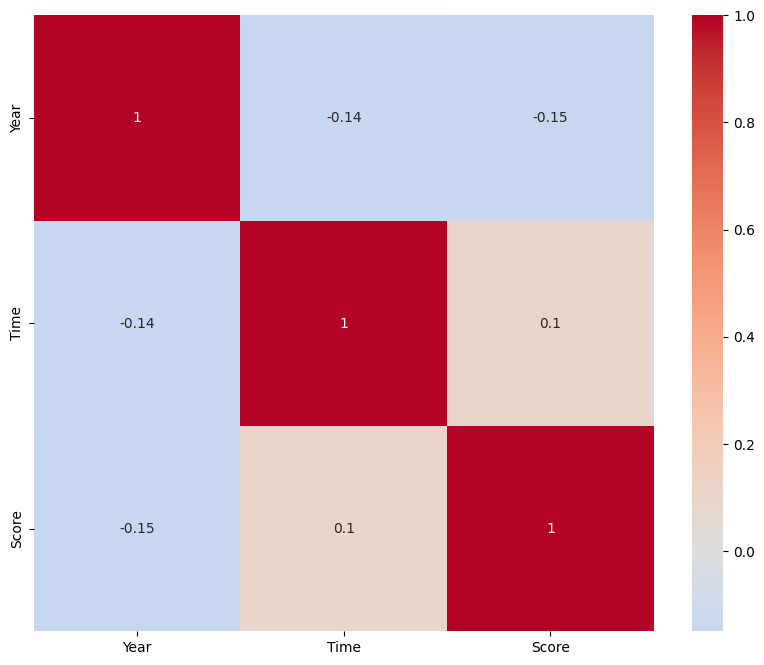

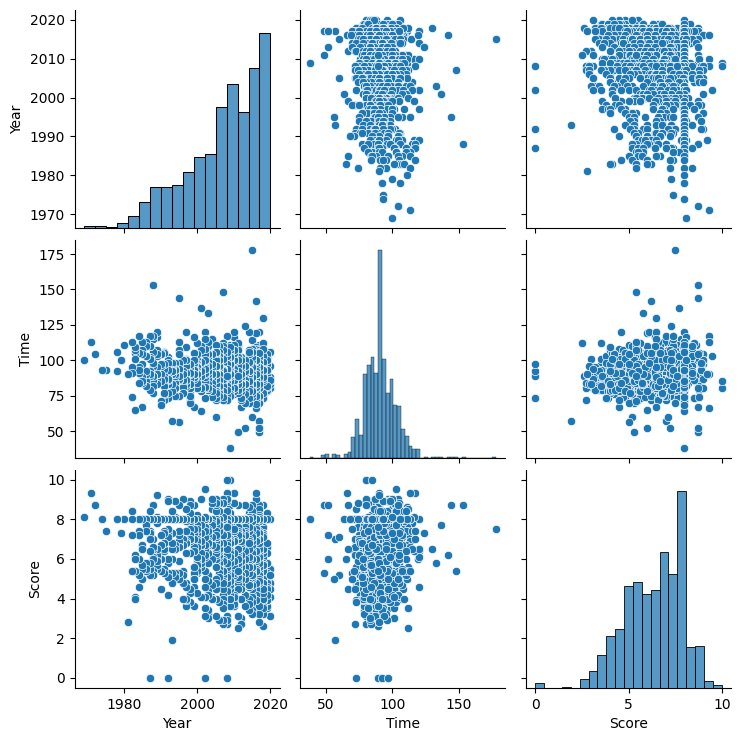

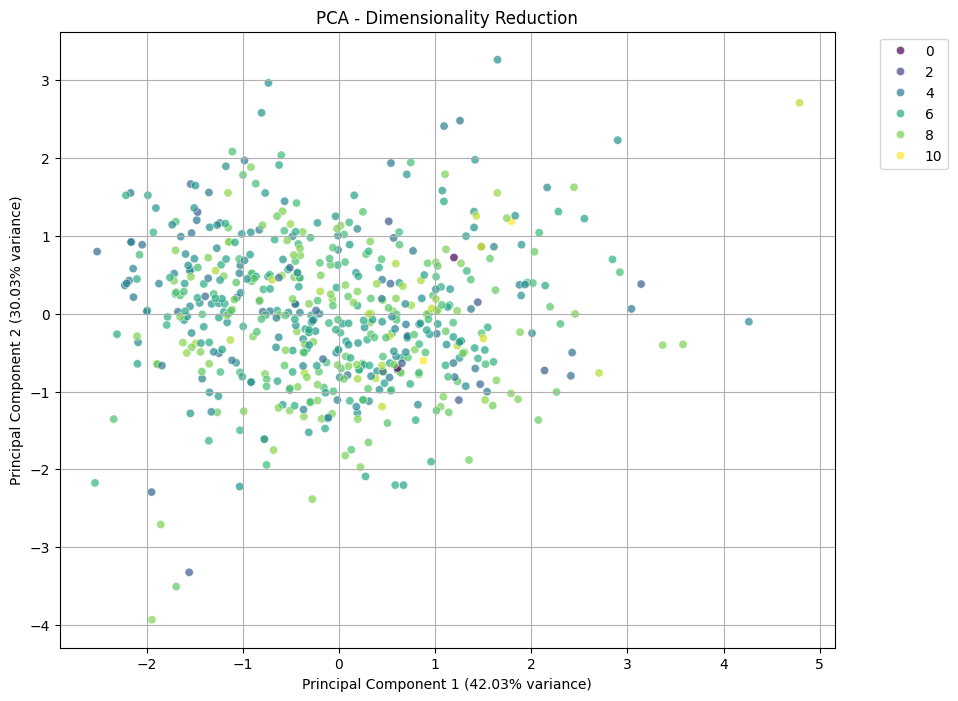

In [ ]:
# Feel free to add any desired methods to the class below this is a suggestion.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
class MultivariateAnalysis:
    def __init__(self, df):
        self.df = df

    def calculate_correlations(self, numerical_cols):
        """
        Calculate correlation coefficients between numerical variables.

        Args:
            numerical_cols (list): A list of column names containing numerical data.

        Returns:
            None (prints the correlation matrix)

        TODO:
        1. Select the numerical columns from the DataFrame.
        2. Calculate the correlation matrix between the numerical columns.
        3. Print the correlation matrix.
        """
        if not numerical_cols:
            print("No numerical columns provided.")
            return
        corr_matrix = self.df[numerical_cols].corr()
        print(corr_matrix)
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
        # plt.title('Correlation Matrix')
        plt.show()

    def visualize_multivariate(self, numerical_cols):
        """
        Use scatter plot matrices or pair plots for multivariate visualization.

        Args:
            numerical_cols (list): A list of column names containing numerical data.

        Returns:
            None (displays the multivariate plot)

        TODO:
        1. Select the numerical columns from the DataFrame.
        2. Create a scatter plot matrix or pair plot using Matplotlib or Seaborn for multivariate visualization.
        3. Set appropriate titles and labels for the plot.
        4. Display the plot.
        """
        if not numerical_cols:
            print("No numerical columns provided.")
            return

        sns.pairplot(self.df[numerical_cols])
        # plt.title('Pair Plot')
        plt.show()

    def dimensionality_reduction(self, numerical_cols, target_column=None):
        """
        Employ dimensionality reduction techniques (e.g., PCA) for better visualization.

        Args:
            numerical_cols (list): A list of column names containing numerical data.
            target_column (str, optional): The column name containing the target variable (if applicable).

        Returns:
            None (displays the dimensionality-reduced plot)

        TODO:
        1. Select the numerical columns from the DataFrame.
        2. Perform standardization on the numerical data.
        3. Apply Principal Component Analysis (PCA) or another dimensionality reduction technique.
        4. If a target_column is provided, color the data points based on the target variable.
        5. Create a scatter plot for the first two principal components.
        6. Set appropriate titles and labels for the plot.
        7. Display the plot.
        """
        if not numerical_cols:
            print("No numerical columns provided.")
            return

        # Standardize the data
        features = self.df[numerical_cols]
        features_scaled = StandardScaler().fit_transform(features)

        # Apply PCA
        pca = PCA(n_components=2)
        principal_components = pca.fit_transform(features_scaled)
        pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

        if target_column:
            pca_df[target_column] = self.df[target_column]

        # Plot PCA result
        plt.figure(figsize=(10, 8))
        if target_column:
            sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue=target_column, palette='viridis', alpha=0.7)
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        else:
            sns.scatterplot(data=pca_df, x='PC1', y='PC2', alpha=0.7)

        plt.title('PCA - Dimensionality Reduction')
        plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
        plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
        plt.grid(True)
        plt.show()

# Example usage
numerical_cols = ['Year', 'Time', 'Score']
target_column = 'Score' # This is a suggestion feel free to try other targets as well.

# Assuming you have a pandas DataFrame named 'df'
multivariate_analysis = MultivariateAnalysis(df)

# TODO: Call the calculate_correlations method with the numerical_cols list
multivariate_analysis.calculate_correlations(numerical_cols)
print()
# TODO: Call the visualize_multivariate method with the numerical_cols list
multivariate_analysis.visualize_multivariate(numerical_cols)
print()
# TODO: Call the dimensionality_reduction method with the numerical_cols list and target_column
multivariate_analysis.dimensionality_reduction(numerical_cols, target_column)

In one paragraph, briefly explain what you found interesting in your analysis.


###8. **Outlier Detection**:
   - Identify and investigate potential outliers
   - Determine if outliers are genuine or result from data issues

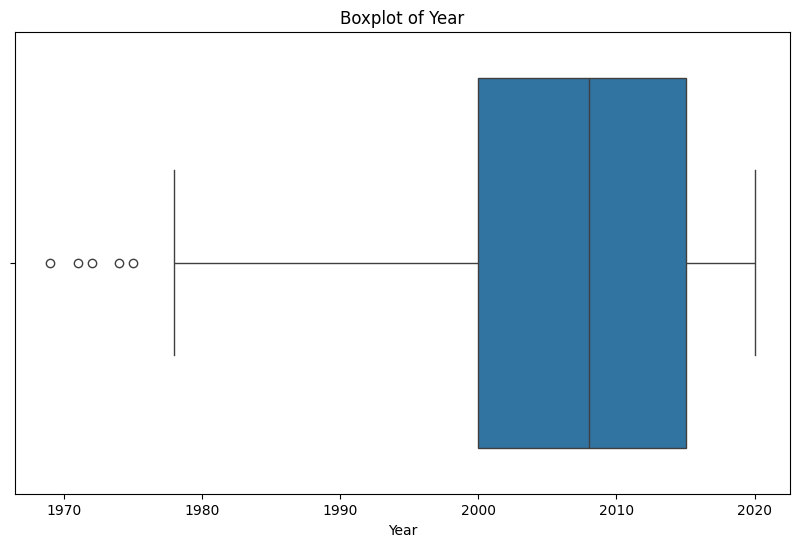

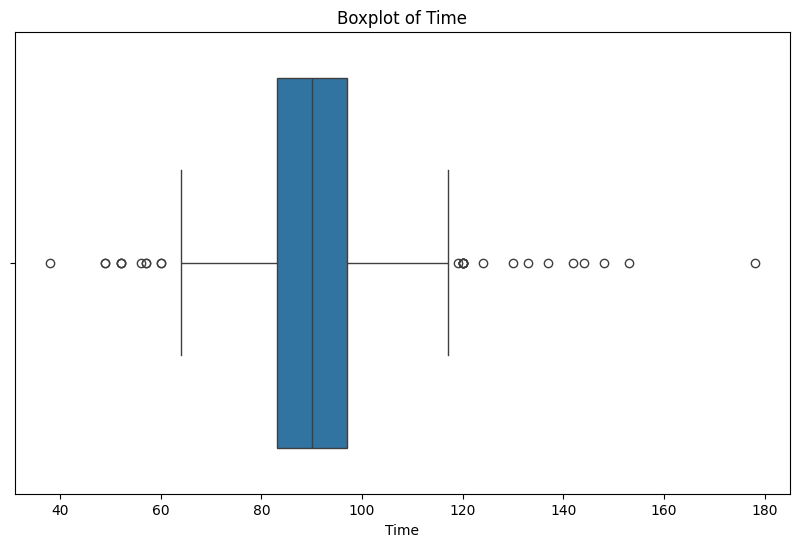

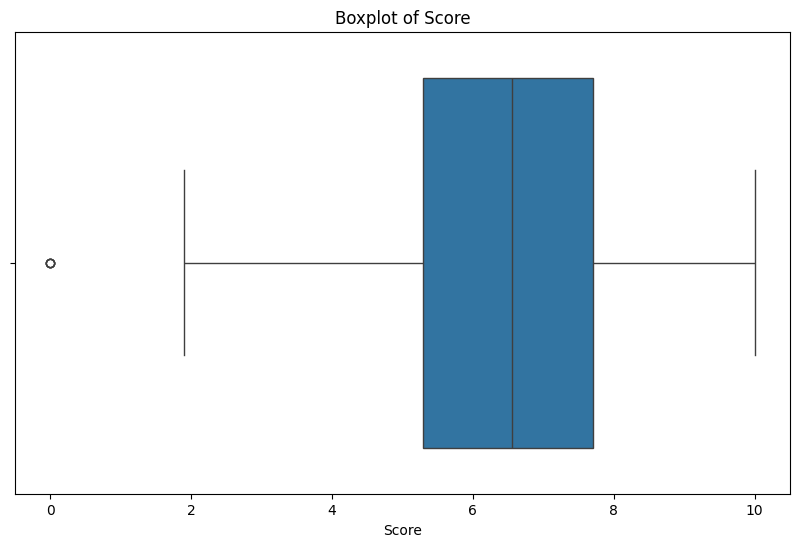

Analyzing Year...
IQR-based Outliers for Year:
1427        Still Life
1429    A Simple Event
1430       The Postman
1431      Mr. Gullible
1432           The Cow
Name: EN_title, dtype: object
Total IQR-based Outliers: 5
Z-score-based Outliers for Year:
1427        Still Life
1429    A Simple Event
1430       The Postman
1431      Mr. Gullible
1432           The Cow
Name: EN_title, dtype: object
Total Z-score-based Outliers: 5


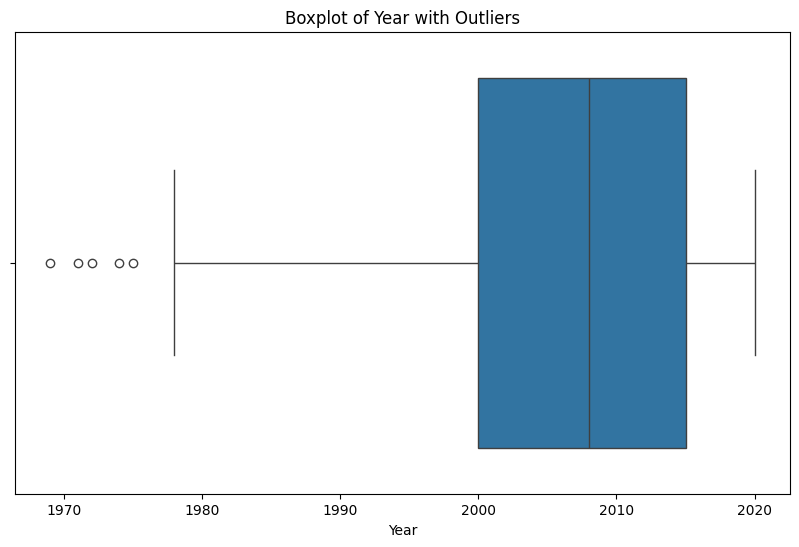

Sample IQR-based Outliers for Year:
1427        Still Life
1429    A Simple Event
1430       The Postman
1431      Mr. Gullible
1432           The Cow
Name: EN_title, dtype: object
Sample Z-score-based Outliers for Year:
1427        Still Life
1429    A Simple Event
1430       The Postman
1431      Mr. Gullible
1432           The Cow
Name: EN_title, dtype: object


Analyzing Time...
IQR-based Outliers for Time:
95      The Midday Adventures The Bloodpath
123                            Twenty Weeks
147                        Saint Petersburg
157                          The Other Wife
168           Bread and Love and Motor 1000
211                       Beyond the Clouds
227                             Immortality
328                         Friends at Work
329              MAHAK: A World She Founded
330                     Mother of the Earth
334                            Flax to Fire
397                       Orphanage of Iran
405           Muhammad The Messenger of God
485          

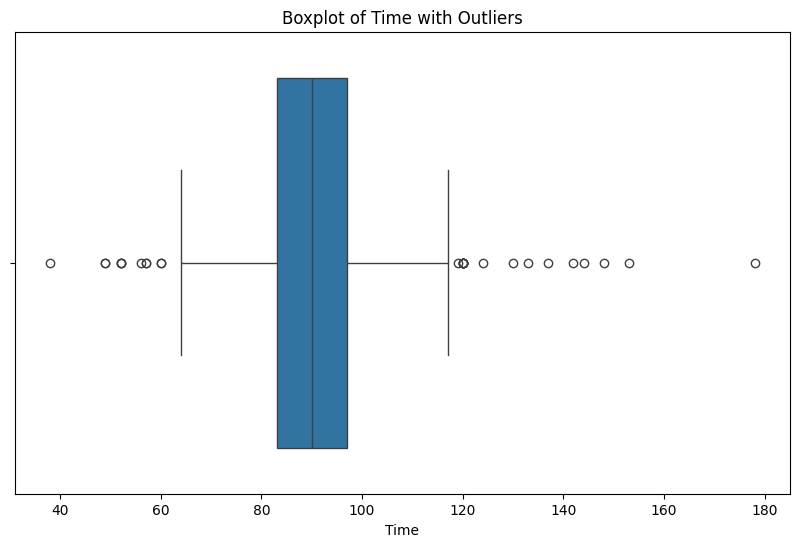

Sample IQR-based Outliers for Time:
95     The Midday Adventures The Bloodpath
123                           Twenty Weeks
147                       Saint Petersburg
157                         The Other Wife
168          Bread and Love and Motor 1000
Name: EN_title, dtype: object
Sample Z-score-based Outliers for Time:
95     The Midday Adventures The Bloodpath
157                         The Other Wife
227                            Immortality
328                        Friends at Work
330                    Mother of the Earth
Name: EN_title, dtype: object


Analyzing Score...
IQR-based Outliers for Score:
177               Autumn
831     Shoot the Target
1055           Tokyo Non
1306      Comeback Glory
Name: EN_title, dtype: object
Total IQR-based Outliers: 4
Z-score-based Outliers for Score:
177               Autumn
831     Shoot the Target
1055           Tokyo Non
1306      Comeback Glory
Name: EN_title, dtype: object
Total Z-score-based Outliers: 4


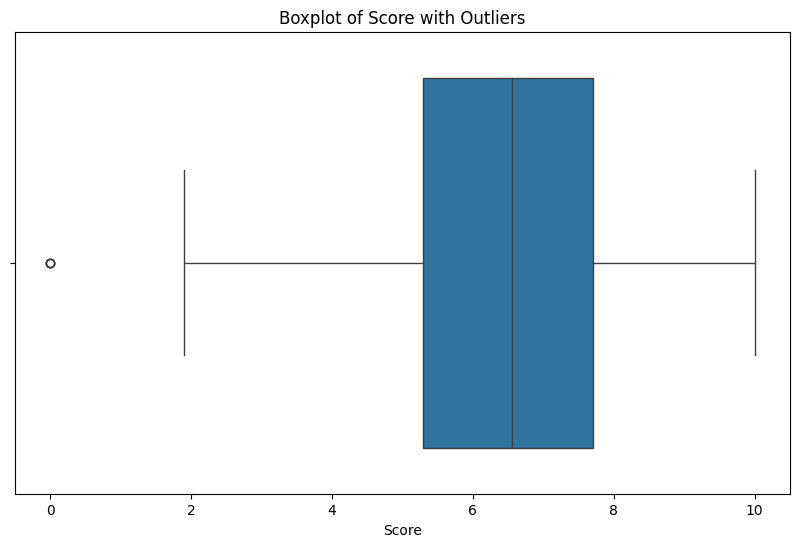

Sample IQR-based Outliers for Score:
177               Autumn
831     Shoot the Target
1055           Tokyo Non
1306      Comeback Glory
Name: EN_title, dtype: object
Sample Z-score-based Outliers for Score:
177               Autumn
831     Shoot the Target
1055           Tokyo Non
1306      Comeback Glory
Name: EN_title, dtype: object




In [ ]:
# Feel free to add any desired methods to the class below this is a suggestion you can change it anyway you like!
from scipy.stats import zscore

class OutlierDetection:
    def __init__(self, df):
        self.df = df

    def identify_outliers(self, numerical_cols):
        """
        Identify and visualize potential outliers for numerical variables.

        Args:
            numerical_cols (list): A list of column names containing numerical data.

        Returns:
            None (displays the plots for identifying outliers)

        TODO:
        1. Iterate through each numerical column.
        2. Create a boxplot for each column using Matplotlib or Seaborn.
        3. Set appropriate titles and labels for the plots.
        4. Display the plots.
        """
        if not numerical_cols:
            print("No numerical columns provided.")
            return

        for col in numerical_cols:
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=self.df[col])
            plt.title(f'Boxplot of {col}')
            plt.xlabel(col)
            plt.show()

    def investigate_outliers(self, numerical_cols):
        """
        Investigate potential outliers and determine if they are genuine or result from data issues.

        Args:
            numerical_cols (list): A list of column names containing numerical data.

        Returns:
            None (prints the analysis of potential outliers)

        TODO:
        1. Iterate through each numerical column.
        2. Identify potential outliers using appropriate techniques (e.g., IQR, z-score).
        3. Investigate the potential outliers by examining their values and associated data.
        4. Determine if the potential outliers are genuine or result from data issues.
        5. Print the analysis of potential outliers, including any insights or recommendations.
        """
        if not numerical_cols:
            print("No numerical columns provided.")
            return

        for col in numerical_cols:
            print(f'Analyzing {col}...')

            # Calculate IQR to identify outliers
            Q1 = self.df[col].quantile(0.25)
            Q3 = self.df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            iqr_outliers = self.df[(self.df[col] < lower_bound) | (self.df[col] > upper_bound)]['EN_title']

            # Calculate z-scores to identify outliers
            z_scores = zscore(self.df[col])
            z_outliers = self.df[(z_scores < -3) | (z_scores > 3)]['EN_title']

            print(f'IQR-based Outliers for {col}:')
            print(iqr_outliers)
            print(f'Total IQR-based Outliers: {len(iqr_outliers)}')

            print(f'Z-score-based Outliers for {col}:')
            print(z_outliers)
            print(f'Total Z-score-based Outliers: {len(z_outliers)}')

            # Visualize outliers
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=self.df[col])
            plt.title(f'Boxplot of {col} with Outliers')
            plt.xlabel(col)
            plt.show()

            if len(iqr_outliers) > 0:
                print(f'Sample IQR-based Outliers for {col}:')
                print(iqr_outliers.head())
            if len(z_outliers) > 0:
                print(f'Sample Z-score-based Outliers for {col}:')
                print(z_outliers.head())
            print("\n")



# Assuming you have a pandas DataFrame named 'df'
outlier_detection = OutlierDetection(df)

# TODO: Call the identify_outliers method with the numerical_cols list
outlier_detection.identify_outliers(numerical_cols)

# TODO: Call the investigate_outliers method with the numerical_cols list
outlier_detection.investigate_outliers(numerical_cols)


###9. **Data Balancing and Feature Engineering**:

*   Genre Mapping and Balancing

*   Resampling Considerations
*   Encoding Categorical Variables




It is possible to map different genres that are similar to a set of base genres. This approach can help avoid an excessive number of unbalanced categories. Here, we provide a mapping of genres that you can utilize if you find it useful. To further maintain a balanced dataset, you can explore resampling techniques.



This is the mapping I came up with, you can change it if you like.

In [ ]:
genre_dict = {
    'Romance': 'Drama',
    'Animation': 'Comedy',
    'Crime': 'Action',
    'War': 'Action',
    'Adventure': 'Action',
    'Mystery': 'Action',
    'Horror': 'Action',
    'Thriller': 'Action',
    'Human Interest & Society': 'Culture',
    'Arts & Literature': 'Culture',
    'Family': 'Culture',
    'History': 'Culture',
    'Architecture': 'Culture',
    'Experimental': 'Culture',
    'Music': 'Culture',
    'Portrait': 'Culture'
}

df['New_Genre'] = df['Genre'].map(genre_dict).fillna(df['Genre'])


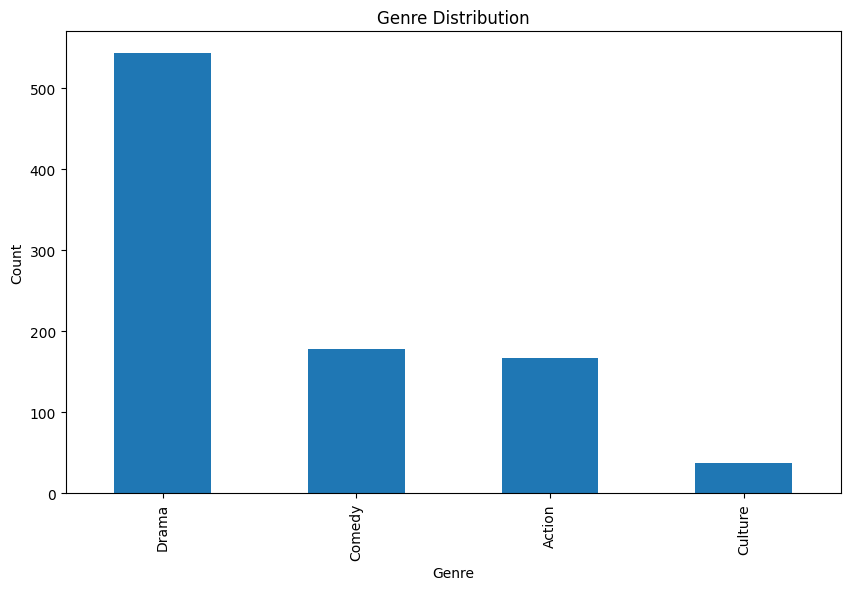

In [ ]:
genre_counts = df['New_Genre'].value_counts()
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


However, it is crucial to exercise caution when applying resampling methods. While these techniques can help balance the dataset, oversampling should not be excessive, as it may lead to model overfitting due to the model being exposed to repeated instances of the data. If you choose to train your model on an oversampled version of the dataset, ensure that your test dataset remains unaffected by the resampling process. It is recommended to split the data into an 80/20 ratio (train/test) before proceeding with resampling. (seed=42)



In [ ]:
# Based on above description, you can modify the given class.
from sklearn.preprocessing import OneHotEncoder
class DataResampling:
    def __init__(self, df, target_col):
        self.df = df
        self.target_col = target_col

    def split_data(self, test_size=0.2, random_state=42):
        """
        Split the dataset into training and testing sets.

        Args:
            test_size (float): The proportion of the dataset to include in the test split (default: 0.2).
            random_state (int): The random seed for reproducibility (default: 42).

        Returns:
            tuple: (X_train, X_test, y_train, y_test)
                X_train (pandas.DataFrame): Training features.
                X_test (pandas.DataFrame): Testing features.
                y_train (pandas.Series): Training target.
                y_test (pandas.Series): Testing target.

        TODO:
        1. Separate the target variable from the features.
        2. Split the dataset into training and testing sets using the provided test_size and random_state.
        3. Return the training and testing features and targets.
        """
        X = self.df.drop(columns=[self.target_col])
        y = self.df[self.target_col]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        return X_train, X_test, y_train, y_test

    def resample_data(self, X_train, y_train, random_state=42):
        """
        Apply resampling techniques to balance the training dataset.

        Args:
            X_train (pandas.DataFrame): Training features.
            y_train (pandas.Series): Training target.
            method (str): Resampling method to use ('random' or 'smote').
            random_state (int): The random seed for reproducibility (default: 42).

        Returns:
            tuple: (X_resampled, y_resampled)
                X_resampled (pandas.DataFrame): Resampled training features.
                y_resampled (pandas.Series): Resampled training target.
        """
        ros = RandomOverSampler(random_state=random_state)
        X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
        return X_resampled, y_resampled
target_col = 'New_Genre'
data_resampling = DataResampling(df, target_col)

# TODO: Call the split_data method to split the dataset into training and testing sets
X_train, X_test, y_train, y_test = data_resampling.split_data()

# TODO: Call the resample_data method to resample the training data
X_resampled, y_resampled = data_resampling.resample_data(X_train, y_train)

Additionally, encoding categorical variables is an essential step in feature engineering for machine learning models. Depending on the nature of your categorical features, you may need to apply techniques such as one-hot encoding or label encoding to convert them into a format suitable for model training.

In [ ]:
# Categorical Encoder Class
class CategoricalEncoder:
    def __init__(self, df, categorical_cols):
        self.df = df
        self.categorical_cols = categorical_cols

    def label_encode(self):
        """
        Apply label encoding to categorical variables.

        Returns:
            pandas.DataFrame: The DataFrame with categorical variables encoded.
        """
        label_encoders = {}
        df_encoded = self.df.copy()

        for col in self.categorical_cols:
            le = LabelEncoder()
            df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
            label_encoders[col] = le

        return df_encoded

    def one_hot_encode(self, drop_first=False):
        """
        Apply one-hot encoding to categorical variables.

        Args:
            drop_first (bool): If True, drop the first column of one-hot encoded data to avoid multicollinearity.

        Returns:
            pandas.DataFrame: The DataFrame with categorical variables one-hot encoded.
        """
        df_encoded = pd.get_dummies(self.df, columns=self.categorical_cols, drop_first=drop_first)
        return df_encoded

categorical_cols = ['New_Genre']
categorical_encoder = CategoricalEncoder(df, categorical_cols)

# TODO: Call the label_encode method to apply label encoding
df_label_encoded = categorical_encoder.label_encode()

# TODO: Call the one_hot_encode method to apply one-hot encoding
df_one_hot_encoded = categorical_encoder.one_hot_encode(drop_first=True)
print("Label Encoded DataFrame:")
print(df_label_encoded.head())

print("\nOne-Hot Encoded DataFrame:")
print(df_one_hot_encoded.head())

Label Encoded DataFrame:
                                                Link            EN_title  \
0  https://www.imvbox.com/watch-persian-movie-ira...   Local Anaesthetic   
1  https://www.imvbox.com/watch-persian-movie-ira...         Disturbance   
2  https://www.imvbox.com/watch-persian-movie-ira...           Highlight   
3  https://www.imvbox.com/watch-persian-movie-ira...               Gilda   
4  https://www.imvbox.com/watch-persian-movie-ira...  Atmosphere Station   

     PENGLISH_title   PERSIAN_title  \
0  Bi Hessie Mozeie    بی‌حسی موضعی   
1         Ashoftegi        آشفته گی   
2           Haylayt         هایلایت   
3            Geelda           گیلدا   
4  Istgahe Atmosfer  ایستگاه اتمسفر   

                                           Content_1  \
0  جلال‌، دانشجوی سابق رشته فلسفه، متوجه می‌شود خ...   
1  «آشفته‌گی» رئالیستی و اجتماعی نیست. یک فیلم اس...   
2  یک تصادف اتومبیل آدم‌هایی را در تقابل با هم قر...   
3  گیلدا ماجرای زنی به نام «گیلدا» را روایت می کن...   
4  

# Fine-tuning

In [ ]:
!rm -rf tmp

In [ ]:
import gc

gc.collect()
torch.cuda.empty_cache()

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_resampled)
y_test_encoded = label_encoder.transform(y_test)
X_train_texts = X_resampled['Preprocessed Persian'].tolist()
X_test_texts = X_test['Preprocessed Persian'].tolist()

In [ ]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

## Persian

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/bert-fa-zwnj-base")
model = AutoModelForSequenceClassification.from_pretrained("HooshvareLab/bert-fa-zwnj-base", num_labels=4)

model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-zwnj-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(42000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

### Preprocessed

In [ ]:
train_encodings = tokenizer(X_train_texts, truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(X_test_texts, truncation=True, padding=True, max_length=512)

train_dataset = CustomDataset(train_encodings, y_train_encoded)
test_dataset = CustomDataset(test_encodings, y_test_encoded)

In [ ]:
num_epochs = 5
batch_size = 8

def calculate_precision_recall_f1(label_ids, preds):
    precision, recall, f1, _ = precision_recall_fscore_support(label_ids, preds, average='weighted')
    return precision, recall, f1

def calculate_accuracy(label_ids, preds):
    return accuracy_score(label_ids, preds)

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    precision, recall, f1 = calculate_precision_recall_f1(p.label_ids, preds)
    acc = calculate_accuracy(p.label_ids, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

def create_training_args():
    return TrainingArguments(
        output_dir="tmp",
        num_train_epochs=num_epochs,
        per_device_train_batch_size=batch_size,
        warmup_steps=500,
        weight_decay=0.01,
        logging_steps=10,
        evaluation_strategy="epoch",
        save_strategy="epoch",
        greater_is_better=True,
        load_best_model_at_end=True,
        metric_for_best_model="accuracy"
    )

def create_trainer(model, train_dataset, test_dataset, training_args):
    return Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        compute_metrics=compute_metrics
    )

training_args = create_training_args()
trainer = create_trainer(model, train_dataset, test_dataset, training_args)
trainer.train()


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.750500,1.333532,0.344086,0.322514,0.479136,0.344086
2,0.389400,1.594873,0.500000,0.491564,0.496320,0.500000
3,0.065800,2.455508,0.532258,0.518137,0.505836,0.532258
4,0.000500,3.031306,0.543011,0.485505,0.482267,0.543011
5,0.000400,2.945950,0.564516,0.516826,0.510736,0.564516


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TrainOutput(global_step=1110, training_loss=0.35337991756680714, metrics={'train_runtime': 710.7723, 'train_samples_per_second': 12.465, 'train_steps_per_second': 1.562, 'total_flos': 1834913949404640.0, 'train_loss': 0.35337991756680714, 'epoch': 5.0})

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5645161290322581
Weighted F1 Score: 0.5168261723107125


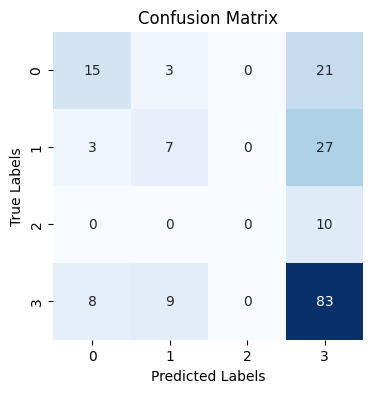

In [ ]:
def display_matrix(conf_matrix):
    """Plot confusion matrix as heatmap."""
    plt.figure(figsize=(4, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

def make_predictions(trainer, test_dataset):
    """Make predictions using the trainer."""
    predictions = trainer.predict(test_dataset)
    return np.argmax(predictions.predictions, axis=1)

def calculate_confusion_matrix(y_true, y_pred):
    """Calculate the confusion matrix."""
    return confusion_matrix(y_true, y_pred)

def calculate_accuracy(y_true, y_pred):
    """Calculate the accuracy score."""
    return accuracy_score(y_true, y_pred)

def calculate_f1_score(y_true, y_pred):
    """Calculate the weighted F1 score."""
    return f1_score(y_true, y_pred, average='weighted')

def display_metrics(y_true, y_pred):
    """Calculate and display all metrics."""
    conf_matrix = calculate_confusion_matrix(y_true, y_pred)
    acc_score = calculate_accuracy(y_true, y_pred)
    f1_weighted = calculate_f1_score(y_true, y_pred)

    print(f'Accuracy: {acc_score}')
    print(f'Weighted F1 Score: {f1_weighted}')

    display_matrix(conf_matrix)

# Assuming trainer is already defined and trained
y_pred = make_predictions(trainer, test_dataset)

# Assuming y_test_encoded is defined
display_metrics(y_test_encoded, y_pred)


### Not Preprocessed


In [ ]:
# Initialize tokenizer and model
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
num_epochs = 5
batch_size = 8
def calculate_precision_recall_f1(label_ids, preds):
    precision, recall, f1, _ = precision_recall_fscore_support(label_ids, preds, average='weighted')
    return precision, recall, f1

def calculate_accuracy(label_ids, preds):
    return accuracy_score(label_ids, preds)

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    precision, recall, f1 = calculate_precision_recall_f1(p.label_ids, preds)
    acc = calculate_accuracy(p.label_ids, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

def create_training_args():
    return TrainingArguments(
        output_dir="tmp",
        num_train_epochs=num_epochs,
        per_device_train_batch_size=batch_size,
        warmup_steps=500,
        weight_decay=0.01,
        logging_steps=10,
        evaluation_strategy="epoch",
        save_strategy="epoch",
        greater_is_better=True,
        load_best_model_at_end=True,
        metric_for_best_model="accuracy"
    )

def create_trainer(model, train_dataset, test_dataset, training_args):
    return Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        compute_metrics=compute_metrics
    )
def initialize_tokenizer_and_model():
    tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/bert-fa-zwnj-base")
    model = AutoModelForSequenceClassification.from_pretrained("HooshvareLab/bert-fa-zwnj-base", num_labels=4)
    return tokenizer, model

# Encode texts
def encode_texts(tokenizer, X_train_texts, X_test_texts):
    train_encodings = tokenizer(X_train_texts, truncation=True, padding=True, max_length=512)
    test_encodings = tokenizer(X_test_texts, truncation=True, padding=True, max_length=512)
    return train_encodings, test_encodings

# Create datasets
def create_datasets(train_encodings, test_encodings, y_train_encoded, y_test_encoded):
    train_dataset = CustomDataset(train_encodings, y_train_encoded)
    test_dataset = CustomDataset(test_encodings, y_test_encoded)
    return train_dataset, test_dataset

# Move model to device
def move_model_to_device(model, device):
    model.to(device)
    print(f"Model device: {next(model.parameters()).device}")
    return model

# Initialize trainer
def initialize_trainer(model, training_args, train_dataset, test_dataset):
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        compute_metrics=compute_metrics
    )
    return trainer

# Train model
def train_model(trainer):
    trainer.train()

# Make predictions
def make_predictions(trainer, test_dataset):
    predictions = trainer.predict(test_dataset)
    return np.argmax(predictions.predictions, axis=1)

# Calculate metrics
def calculate_metrics(y_test_encoded, y_pred):
    conf_matrix = confusion_matrix(y_test_encoded, y_pred)
    acc_score = accuracy_score(y_test_encoded, y_pred)
    f1_weighted = f1_score(y_test_encoded, y_pred, average='weighted')
    return conf_matrix, acc_score, f1_weighted

# Display metrics
def display_results(acc_score, f1_weighted, conf_matrix):
    display_metrics(acc_score, f1_weighted)
    display_matrix(conf_matrix)

tokenizer, model = initialize_tokenizer_and_model()

X_train_texts = X_resampled['Content_1'].tolist()
X_test_texts = X_test['Content_1'].tolist()

train_encodings, test_encodings = encode_texts(tokenizer, X_train_texts, X_test_texts)
train_dataset, test_dataset = create_datasets(train_encodings, test_encodings, y_train_encoded, y_test_encoded)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = move_model_to_device(model, device)

training_args = create_training_args()  # Assuming create_training_args() is defined as in previous example
trainer = initialize_trainer(model, training_args, train_dataset, test_dataset)

train_model(trainer)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-zwnj-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model device: cuda:0


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.788900,1.305414,0.381720,0.397734,0.513438,0.381720
2,0.306600,1.700278,0.462366,0.431884,0.415841,0.462366
3,0.104000,2.649744,0.548387,0.506810,0.497478,0.548387
4,0.000500,3.624538,0.521505,0.445180,0.449742,0.521505
5,0.000400,3.522537,0.521505,0.466138,0.509141,0.521505


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5483870967741935
Weighted F1 Score: 0.5068101938934966


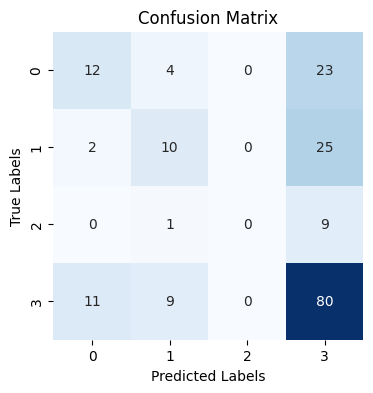

In [ ]:
def display_matrix(conf_matrix):
    """Plot confusion matrix as heatmap."""
    plt.figure(figsize=(4, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

def make_predictions(trainer, test_dataset):
    """Make predictions using the trainer."""
    predictions = trainer.predict(test_dataset)
    return np.argmax(predictions.predictions, axis=1)

def calculate_confusion_matrix(y_true, y_pred):
    """Calculate the confusion matrix."""
    return confusion_matrix(y_true, y_pred)

def calculate_accuracy(y_true, y_pred):
    """Calculate the accuracy score."""
    return accuracy_score(y_true, y_pred)

def calculate_f1_score(y_true, y_pred):
    """Calculate the weighted F1 score."""
    return f1_score(y_true, y_pred, average='weighted')

def display_metrics(y_true, y_pred):
    """Calculate and display all metrics."""
    conf_matrix = calculate_confusion_matrix(y_true, y_pred)
    acc_score = calculate_accuracy(y_true, y_pred)
    f1_weighted = calculate_f1_score(y_true, y_pred)

    print(f'Accuracy: {acc_score}')
    print(f'Weighted F1 Score: {f1_weighted}')

    display_matrix(conf_matrix)

# Assuming trainer is already defined and trained
y_pred = make_predictions(trainer, test_dataset)

# Assuming y_test_encoded is defined
display_metrics(y_test_encoded, y_pred)


## English


In [ ]:
def display_matrix(conf_matrix):
    plt.figure(figsize=(4, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=4)

model.to(device)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

### Preprocessed

In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_resampled)
y_test_encoded = label_encoder.transform(y_test)

X_train_texts = X_resampled['Preprocessed English'].tolist()
X_test_texts = X_test['Preprocessed English'].tolist()

train_encodings = tokenizer(X_train_texts, truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(X_test_texts, truncation=True, padding=True, max_length=512)

train_dataset = CustomDataset(train_encodings, y_train_encoded)
test_dataset = CustomDataset(test_encodings, y_test_encoded)

num_epochs = 3
batch_size = 8

def calculate_precision_recall_f1(label_ids, preds):
    precision, recall, f1, _ = precision_recall_fscore_support(label_ids, preds, average='weighted')
    return precision, recall, f1

def calculate_accuracy(label_ids, preds):
    return accuracy_score(label_ids, preds)

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    precision, recall, f1 = calculate_precision_recall_f1(p.label_ids, preds)
    acc = calculate_accuracy(p.label_ids, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

def create_training_args():
    return TrainingArguments(
        output_dir="tmp",
        num_train_epochs=num_epochs,
        per_device_train_batch_size=batch_size,
        warmup_steps=500,
        weight_decay=0.01,
        logging_steps=10,
        evaluation_strategy="epoch",
        save_strategy="epoch",
        greater_is_better=True,
        load_best_model_at_end=True,
        metric_for_best_model="accuracy"
    )

def create_trainer(model, train_dataset, test_dataset, training_args):
    return Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        compute_metrics=compute_metrics
    )

training_args = create_training_args()
trainer = create_trainer(model, train_dataset, test_dataset, training_args)
trainer.train()


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.850800,1.215865,0.419355,0.435115,0.488949,0.419355
2,0.379200,1.527797,0.456989,0.453190,0.477198,0.456989
3,0.143900,2.044850,0.559140,0.528212,0.567586,0.559140


TrainOutput(global_step=666, training_loss=0.6469211855360696, metrics={'train_runtime': 397.4867, 'train_samples_per_second': 13.374, 'train_steps_per_second': 1.676, 'total_flos': 1005332506274304.0, 'train_loss': 0.6469211855360696, 'epoch': 3.0})

Accuracy: 0.5591397849462365
Weighted F1 Score: 0.5282117846898386


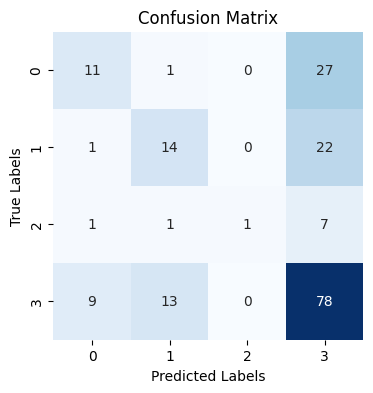

In [ ]:
def display_matrix(conf_matrix):
    """Plot confusion matrix as heatmap."""
    plt.figure(figsize=(4, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

def make_predictions(trainer, test_dataset):
    """Make predictions using the trainer."""
    predictions = trainer.predict(test_dataset)
    return np.argmax(predictions.predictions, axis=1)

def calculate_confusion_matrix(y_true, y_pred):
    """Calculate the confusion matrix."""
    return confusion_matrix(y_true, y_pred)

def calculate_accuracy(y_true, y_pred):
    """Calculate the accuracy score."""
    return accuracy_score(y_true, y_pred)

def calculate_f1_score(y_true, y_pred):
    """Calculate the weighted F1 score."""
    return f1_score(y_true, y_pred, average='weighted')

def display_metrics(y_true, y_pred):
    """Calculate and display all metrics."""
    conf_matrix = calculate_confusion_matrix(y_true, y_pred)
    acc_score = calculate_accuracy(y_true, y_pred)
    f1_weighted = calculate_f1_score(y_true, y_pred)

    print(f'Accuracy: {acc_score}')
    print(f'Weighted F1 Score: {f1_weighted}')

    display_matrix(conf_matrix)

# Assuming trainer is already defined and trained
y_pred = make_predictions(trainer, test_dataset)

# Assuming y_test_encoded is defined
display_metrics(y_test_encoded, y_pred)


### Not Preprocessed


In [ ]:
# Initialize tokenizer and model
def initialize_tokenizer_and_model():
    tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/bert-fa-zwnj-base")
    model = AutoModelForSequenceClassification.from_pretrained("HooshvareLab/bert-fa-zwnj-base", num_labels=4)
    return tokenizer, model

# Encode texts
def encode_texts(tokenizer, X_train_texts, X_test_texts):
    train_encodings = tokenizer(X_train_texts, truncation=True, padding=True, max_length=512)
    test_encodings = tokenizer(X_test_texts, truncation=True, padding=True, max_length=512)
    return train_encodings, test_encodings

# Create datasets
def create_datasets(train_encodings, test_encodings, y_train_encoded, y_test_encoded):
    train_dataset = CustomDataset(train_encodings, y_train_encoded)
    test_dataset = CustomDataset(test_encodings, y_test_encoded)
    return train_dataset, test_dataset

# Move model to device
def move_model_to_device(model, device):
    model.to(device)
    print(f"Model device: {next(model.parameters()).device}")
    return model

# Initialize trainer
def initialize_trainer(model, training_args, train_dataset, test_dataset):
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        compute_metrics=compute_metrics
    )
    return trainer

# Train model
def train_model(trainer):
    trainer.train()

# Make predictions
def make_predictions(trainer, test_dataset):
    predictions = trainer.predict(test_dataset)
    return np.argmax(predictions.predictions, axis=1)

# Calculate metrics
def calculate_metrics(y_test_encoded, y_pred):
    conf_matrix = confusion_matrix(y_test_encoded, y_pred)
    acc_score = accuracy_score(y_test_encoded, y_pred)
    f1_weighted = f1_score(y_test_encoded, y_pred, average='weighted')
    return conf_matrix, acc_score, f1_weighted

# Display metrics
def display_results(acc_score, f1_weighted, conf_matrix):
    display_metrics(acc_score, f1_weighted)
    display_matrix(conf_matrix)

tokenizer, model = initialize_tokenizer_and_model()

X_train_texts = X_resampled['Content_1'].tolist()
X_test_texts = X_test['Content_1'].tolist()

train_encodings, test_encodings = encode_texts(tokenizer, X_train_texts, X_test_texts)
train_dataset, test_dataset = create_datasets(train_encodings, test_encodings, y_train_encoded, y_test_encoded)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = move_model_to_device(model, device)

training_args = create_training_args()  # Assuming create_training_args() is defined as in previous example
trainer = initialize_trainer(model, training_args, train_dataset, test_dataset)

train_model(trainer)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-zwnj-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model device: cuda:0


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.753200,1.501390,0.284946,0.263896,0.432054,0.284946
2,0.386700,1.730784,0.456989,0.449442,0.444622,0.456989
3,0.124200,2.478472,0.543011,0.492292,0.501657,0.543011


Accuracy: 0.543010752688172
Weighted F1 Score: 0.4922919559066194


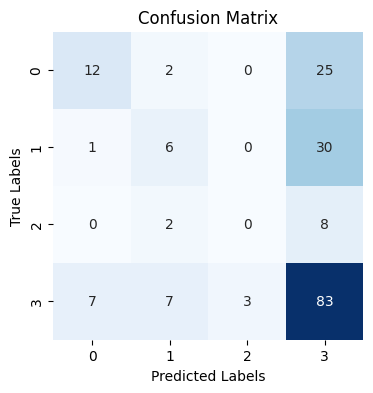

In [ ]:
def display_matrix(conf_matrix):
    """Plot confusion matrix as heatmap."""
    plt.figure(figsize=(4, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

def make_predictions(trainer, test_dataset):
    """Make predictions using the trainer."""
    predictions = trainer.predict(test_dataset)
    return np.argmax(predictions.predictions, axis=1)

def calculate_confusion_matrix(y_true, y_pred):
    """Calculate the confusion matrix."""
    return confusion_matrix(y_true, y_pred)

def calculate_accuracy(y_true, y_pred):
    """Calculate the accuracy score."""
    return accuracy_score(y_true, y_pred)

def calculate_f1_score(y_true, y_pred):
    """Calculate the weighted F1 score."""
    return f1_score(y_true, y_pred, average='weighted')

def display_metrics(y_true, y_pred):
    """Calculate and display all metrics."""
    conf_matrix = calculate_confusion_matrix(y_true, y_pred)
    acc_score = calculate_accuracy(y_true, y_pred)
    f1_weighted = calculate_f1_score(y_true, y_pred)

    print(f'Accuracy: {acc_score}')
    print(f'Weighted F1 Score: {f1_weighted}')

    display_matrix(conf_matrix)

# Assuming trainer is already defined and trained
y_pred = make_predictions(trainer, test_dataset)

# Assuming y_test_encoded is defined
display_metrics(y_test_encoded, y_pred)


## Results Analysis

Analyze the results of the Fine-tuning section.

Class 1 and Class 2 showed improvements in precision and recall after preprocessing, indicating that preprocessing helped the model better identify these classes.
Class 0 and Class 3 showed a slight decrease in performance metrics, suggesting that preprocessing might have introduced noise or removed some useful information for these classes.
The most significant improvement was seen in Class 2, which had no true positives in the non-processed data but achieved a precision of 1.0 in the preprocessed data.
Overall, preprocessing appears to have had mixed effects on the model's performance, improving the identification of some classes while slightly degrading the performance for others. Further tuning and possibly different preprocessing techniques could be explored to enhance the overall model performance.